In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer

In [2]:
from IPython.display import display, HTML
import warnings

In [3]:
display(HTML("<style>.container { width:100% !important; }</style>"))
warnings.filterwarnings('ignore')
pd.options.display.float_format = "{:.2f}".format

In [4]:
INPUT = 'przetwarzanie_faktur_zadanie.csv'

In [5]:
CONFIG = 'config.json'

In [6]:
# Get the absolute path of the file within the INPUTS directory
FILE_PATH = os.path.join(os.getcwd(), 'INPUTS', INPUT)

# Print the file path
print(FILE_PATH)

C:\Users\KonuTech\PycharmProjects\yet-another-analysis\INPUTS\przetwarzanie_faktur_zadanie.csv


In [7]:
# Get the absolute path of the config within the CONFIGS directory
CONFIG_PATH = os.path.join(os.getcwd(), 'CONFIGS', CONFIG)

# Print the fileconfig_pathpath
print(CONFIG_PATH)

C:\Users\KonuTech\PycharmProjects\yet-another-analysis\CONFIGS\config.json


In [8]:
with open(CONFIG_PATH, encoding='utf-8') as f:
    CONFIG = json.load(f)

In [9]:
# INDEX_COL = CONFIG["INPUTS"]["INDEX_COLUMNS"]
SEP = CONFIG["INPUTS"]["SEPARATOR"]
# DECIMAL = CONFIG["INPUTS"]["DECIMAL"]
ENCODING = CONFIG["INPUTS"]["ENCODING"]
DATE_COLUMNS = CONFIG["INPUTS"]["DATE_COLUMNS"]
# FLOAT_PRECISION = CONFIG["INPUTS"]["FLOAT_PRECISION"]
DTYPE = CONFIG["INPUTS"]["DTYPE"]
COLUMNS_WITH_NAN_VALUES = CONFIG["INPUTS"]["COLUMNS_WITH_NAN_VALUES"]
# # X_ORDER = CONFIG["X_ORDER"]
HUE_ORDER = CONFIG["HUE_ORDER"]
COL_ORDER = CONFIG["COL_ORDER"]
WEEKDAY_ORDER = CONFIG["WEEKDAY_ORDER"]

In [10]:
# INDEX_COL

In [11]:
SEP

';'

In [12]:
ENCODING

'utf-8'

In [13]:
DATE_COLUMNS

['StartDateTimeUtc']

In [14]:
DTYPE

{'ID_Process': 'object',
 'ID_Document': 'object',
 'Queue': 'object',
 'ProcessingDuration': 'int64',
 'Duration': 'int64',
 'InputPageCount': 'int64',
 'MessagesInQueue': 'int64',
 'Retries': 'int64'}

In [15]:
COLUMNS_WITH_NAN_VALUES

['Duration']

In [16]:
HUE_ORDER

['potok_0-0',
 'potok_1-1',
 'potok_1-2',
 'potok_2-1',
 'potok_2-2',
 'potok_3-1',
 'potok_3-2']

In [17]:
COL_ORDER

['potok_0', 'potok_1', 'potok_2', 'potok_3']

In [18]:
WEEKDAY_ORDER

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [19]:
df = pd.read_csv(
    filepath_or_buffer=FILE_PATH,
#     index_col=INDEX_COL,
    sep=SEP,
    encoding=ENCODING,
    engine="c",
    low_memory=False,
    parse_dates=DATE_COLUMNS,
#     dtype=DTYPE
)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121190 entries, 0 to 1121189
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   ID_Process          1121190 non-null  int64         
 1   Queue               1107824 non-null  object        
 2   ID_Document         1107824 non-null  float64       
 3   ProcessingDuration  1085406 non-null  float64       
 4   Duration            1080011 non-null  float64       
 5   InputPageCount      1085406 non-null  float64       
 6   MessagesInQueue     1121190 non-null  int64         
 7   Retries             1121190 non-null  int64         
 8   StartDateTimeUtc    1121190 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 77.0+ MB


In [21]:
df.head()

ID_Process      Queue  ID_Document  ProcessingDuration  Duration  \
0     2299375  potok_1-1   2270386.00             2583.00   2940.00   
1      202658  potok_1-1    245850.00             5486.00   6626.00   
2     2323656  potok_3-1   2304772.00             2079.00   2606.00   
3      115622  potok_1-2    165259.00             2915.00   3228.00   
4      343261  potok_1-1    237985.00             2480.00   3114.00   

   InputPageCount  MessagesInQueue  Retries        StartDateTimeUtc  
0            1.00                4        0 2023-03-02 12:47:31.880  
1            2.00                6        0 2023-02-10 08:33:17.910  
2            1.00                7        0 2023-03-03 13:35:13.690  
3            2.00                1        0 2023-02-15 14:18:19.550  
4            1.00                9        0 2023-02-15 07:26:05.317

In [22]:
df.tail()

ID_Process      Queue  ID_Document  ProcessingDuration  Duration  \
1121185     2627984  potok_3-2   2571026.00             3040.00   3683.00   
1121186     2492632  potok_3-1   2457336.00             3127.00   3425.00   
1121187     2771801  potok_3-2   2812898.00              298.00    715.00   
1121188     2343195  potok_1-2   2328046.00             9247.00   9689.00   
1121189      272829  potok_1-2     11148.00               74.00  10153.00   

         InputPageCount  MessagesInQueue  Retries        StartDateTimeUtc  
1121185            1.00                2        0 2023-03-13 19:29:07.610  
1121186            1.00                6        0 2023-03-09 12:50:04.387  
1121187            2.00                0        0 2023-03-24 07:14:42.087  
1121188            1.00                4        0 2023-03-05 21:14:38.007  
1121189            3.00                0        0 2023-02-13 10:47:07.257

In [23]:
df.describe()

ID_Process  ID_Document  ProcessingDuration    Duration  \
count  1121190.00   1107824.00          1085406.00  1080011.00   
mean   1623558.71   1616588.28             4187.53    25350.38   
std    1131326.47   1122477.06             5195.52   323548.18   
min          1.00         3.00               34.00      271.00   
25%     280298.25    276786.75             2264.00     2714.00   
50%    2311131.50   2295873.50             2973.00     3707.00   
75%    2591428.75   2572823.25             4841.00     7064.00   
max    2883900.00   2861842.00          1422420.00 45199914.00   

       InputPageCount  MessagesInQueue    Retries  
count      1085406.00       1121190.00 1121190.00  
mean             1.21             9.01       0.00  
std              2.13            52.46       0.09  
min              1.00             0.00       0.00  
25%              1.00             1.00       0.00  
50%              1.00             3.00       0.00  
75%              1.00             7.00       0.00  
max            736.00          2018.00       9.00

In [24]:
df.isnull().sum()

ID_Process                0
Queue                 13366
ID_Document           13366
ProcessingDuration    35784
Duration              41179
InputPageCount        35784
MessagesInQueue           0
Retries                   0
StartDateTimeUtc          0
dtype: int64

## preprocessing

## ON/OFF -- Filling NaN

In [25]:
# df['ProcessingDuration'].fillna(1e-1000, inplace=True)
# df['Duration'].fillna(1e-1000, inplace=True)
# df['InputPageCount'].fillna(0, inplace=True)

In [26]:
# Convert the time values to minutes, hours, and days
df['ProcessingDuration_sec'] = df['ProcessingDuration'] / 1000
# df['ProcessingDuration_min'] = df['ProcessingDuration'] / (1000 * 60)
# df['ProcessingDuration_hours'] = df['ProcessingDuration'] / (1000 * 60 * 60)
# df['ProcessingDuration_days'] = df['ProcessingDuration'] / (1000 * 60 * 60 * 24)

In [27]:
# Convert the time values to minutes, hours, and days
df['Duration_sec'] = df['Duration'] / 1000
# df['Duration_min'] = df['Duration'] / (1000 * 60)
# df['Duration_hours'] = df['Duration'] / (1000 * 60 * 60)
# df['Duration_days'] = df['Duration'] / (1000 * 60 * 60 * 24)

In [28]:
# Create a FunctionTransformer object with a logarithmic transformation function
# log_transformer = FunctionTransformer(np.log1p)
log_transformer = FunctionTransformer(np.log10)

# Apply the logarithmic transformation to the "Sales" column
df['Log_ProcessingDuration'] = log_transformer.transform(df[['ProcessingDuration']] + 1)
df['Log_ProcessingDuration_sec'] = log_transformer.transform(df[['ProcessingDuration_sec']] + 1)
# df['Log_ProcessingDuration_min'] = log_transformer.transform(df[['ProcessingDuration_min']] + 1)
# df['Log_ProcessingDuration_hours'] = log_transformer.transform(df[['ProcessingDuration_hours']] + 1)
# df['Log_ProcessingDuration_days'] = log_transformer.transform(df[['ProcessingDuration_days']] + 1)

df['Log_Duration'] = log_transformer.transform(df[['Duration']] + 1)
df['Log_Duration_sec'] = log_transformer.transform(df[['Duration_sec']] + 1)
# df['Log_Duration_min'] = log_transformer.transform(df[['Duration_min']] + 1)
# df['Log_Duration_hours'] = log_transformer.transform(df[['Duration_hours']] + 1)
# df['Log_Duration_days'] = log_transformer.transform(df[['Duration_days']] + 1)

In [29]:
df['Queue'] = df['Queue'].fillna('Potok_0-0')

In [30]:
df[['potok']] = 'potok_' + df['Queue'].str.extract(r'^potok_(\d+)')

In [31]:
for i, v in enumerate(sorted(df["Queue"].unique())):
    print("POTOK:", i, v)
    print(df[df["Queue"] == v].isnull().sum(), "\n")

POTOK: 0 Potok_0-0
ID_Process                        0
Queue                             0
ID_Document                   13366
ProcessingDuration                0
Duration                        530
InputPageCount                    0
MessagesInQueue                   0
Retries                           0
StartDateTimeUtc                  0
ProcessingDuration_sec            0
Duration_sec                    530
Log_ProcessingDuration            0
Log_ProcessingDuration_sec        0
Log_Duration                    530
Log_Duration_sec                530
potok                         13366
dtype: int64 

POTOK: 1 potok_1-1
ID_Process                        0
Queue                             0
ID_Document                       0
ProcessingDuration            10562
Duration                      11557
InputPageCount                10562
MessagesInQueue                   0
Retries                           0
StartDateTimeUtc                  0
ProcessingDuration_sec        10562
Duration_se

In [32]:
# df[
#     [
#         'year',
#         'month',
#         'day',
#         'hour',
#         'minute',
#         'second',
#         'microsecond'
#     ]
# ] = pd.to_datetime(df['StartDateTimeUtc']).dt.strftime('%Y-%m-%d %H:%M:%S.%f').str.extract(r'(\d{4})-(\d{2})-(\d{2})\s(\d{2}):(\d{2}):(\d{2})\.(\d{6})')


In [133]:
# Convert to datetime
df['date_time'] = pd.to_datetime(df['StartDateTimeUtc'])

# Extract date-related columns
df['year'] = df['date_time'].dt.year
df['month'] = df['date_time'].dt.month
df['week'] = df['date_time'].dt.week
df['day'] = df['date_time'].dt.day
df['hour'] = df['date_time'].dt.hour
df['minute'] = df['date_time'].dt.minute
df['second'] = df['date_time'].dt.second
df['microsecond'] = df['date_time'].dt.microsecond
# df['weekday'] = df['date_time'].dt.weekday
# Create a new column indicating the weekday (Monday is 1st, Sunday is 7th)
df['weekday'] = df['date_time'].dt.weekday.apply(lambda x: x + 1 if x != 6 else 7)
df['weekday_name'] = df['date_time'].dt.strftime('%A')
df['month_name'] = df['date_time'].dt.strftime('%B')

# Create flag for typical working hours (9 AM to 5 PM on weekdays)
df['working_hours'] = np.where((df['weekday'].isin([1,2,3,4,5])) & (df['hour'] >= 9) & (df['hour'] < 17), 1, 0)

In [134]:
df[df['weekday'].isin([6,7])].head()

ID_Process      Queue  ID_Document  ProcessingDuration  Duration  \
19     2347610  potok_1-2   2323521.00             5174.00   5681.00   
46      303874  potok_1-1     13020.00             2331.00   2845.00   
48      785128  potok_3-2    693766.00             6149.00   7274.00   
62      129788  potok_1-2      6491.00            10984.00  44663.00   
85     2791819  potok_3-1   2683288.00             4195.00   4518.00   

    InputPageCount  MessagesInQueue  Retries        StartDateTimeUtc  \
19            1.00                1        0 2023-03-05 11:53:10.883   
46            1.00                4        0 2023-02-19 15:10:10.867   
48            1.00               10        0 2023-02-05 19:47:58.283   
62            1.00               19        0 2023-02-19 03:27:32.237   
85            1.00                1        0 2023-03-19 20:20:47.470   

    ProcessingDuration_sec  ...  day  hour  minute  second  microsecond  \
19                    5.17  ...    5    11      53      10       883000   
46                    2.33  ...   19    15      10      10       867000   
48                    6.15  ...    5    19      47      58       283000   
62                   10.98  ...   19     3      27      32       237000   
85                    4.20  ...   19    20      20      47       470000   

   weekday weekday_name  working_hours  month_name  week  
19       7       Sunday              0       March     9  
46       7       Sunday              0    February     7  
48       7       Sunday              0    February     5  
62       7       Sunday              0    February     7  
85       7       Sunday              0       March    11  

[5 rows x 29 columns]

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121190 entries, 0 to 1121189
Data columns (total 29 columns):
 #   Column                      Non-Null Count    Dtype         
---  ------                      --------------    -----         
 0   ID_Process                  1121190 non-null  int64         
 1   Queue                       1121190 non-null  object        
 2   ID_Document                 1107824 non-null  float64       
 3   ProcessingDuration          1085406 non-null  float64       
 4   Duration                    1080011 non-null  float64       
 5   InputPageCount              1085406 non-null  float64       
 6   MessagesInQueue             1121190 non-null  int64         
 7   Retries                     1121190 non-null  int64         
 8   StartDateTimeUtc            1121190 non-null  datetime64[ns]
 9   ProcessingDuration_sec      1085406 non-null  float64       
 10  Duration_sec                1080011 non-null  float64       
 11  Log_ProcessingDuration  

## samplowanie

In [136]:
df_sample = df.sample(frac=0.01, replace=False)
df_sample

ID_Process      Queue  ID_Document  ProcessingDuration  Duration  \
359559      2370851  potok_1-1   2344921.00             2435.00   2983.00   
255501      2348742  potok_1-2   2328652.00             6424.00   8746.00   
889127       809058  potok_1-1    379144.00             3548.00   5085.00   
1099548     2876481  potok_3-2   2769572.00             3116.00   3468.00   
513887      2213139  potok_1-1   2186345.00             6159.00   6442.00   
...             ...        ...          ...                 ...       ...   
190775      2246561  potok_1-2   2238963.00             2276.00   2683.00   
80285        257847  Potok_0-0          NaN               94.00    634.00   
818225      2858906  potok_3-1   2788775.00             3683.00   4081.00   
466582       461079  potok_3-1    366630.00             6181.00  48590.00   
42339       2512485  potok_1-2   2512682.00             5248.00   5651.00   

         InputPageCount  MessagesInQueue  Retries        StartDateTimeUtc  \
359559             1.00                2        0 2023-03-06 13:26:20.273   
255501             1.00               23        0 2023-03-05 20:02:40.840   
889127             1.00                7        0 2023-02-06 10:49:11.900   
1099548            1.00                0        0 2023-03-19 18:48:26.320   
513887             1.00                7        0 2023-02-23 11:43:25.900   
...                 ...              ...      ...                     ...   
190775             1.00                0        0 2023-03-01 11:16:52.627   
80285              1.00                0        0 2023-02-10 09:07:26.310   
818225             1.00                5        0 2023-03-20 12:57:09.543   
466582             1.00               47        0 2023-02-06 08:54:29.317   
42339              1.00                3        0 2023-03-09 10:24:25.850   

         ProcessingDuration_sec  ...  day  hour  minute  second  microsecond  \
359559                     2.44  ...    6    13      26      20       273000   
255501                     6.42  ...    5    20       2      40       840000   
889127                     3.55  ...    6    10      49      11       900000   
1099548                    3.12  ...   19    18      48      26       320000   
513887                     6.16  ...   23    11      43      25       900000   
...                         ...  ...  ...   ...     ...     ...          ...   
190775                     2.28  ...    1    11      16      52       627000   
80285                      0.09  ...   10     9       7      26       310000   
818225                     3.68  ...   20    12      57       9       543000   
466582                     6.18  ...    6     8      54      29       317000   
42339                      5.25  ...    9    10      24      25       850000   

        weekday weekday_name  working_hours  month_name  week  
359559        1       Monday              1       March    10  
255501        7       Sunday              0       March     9  
889127        1       Monday              1    February     6  
1099548       7       Sunday              0       March    11  
513887        4     Thursday              1    February     8  
...         ...          ...            ...         ...   ...  
190775        3    Wednesday              1       March     9  
80285         5       Friday              1    February     6  
818225        1       Monday              1       March    12  
466582        1       Monday              0    February     6  
42339         4     Thursday              1       March    10  

[11212 rows x 29 columns]

In [137]:
df_sample.describe()

ID_Process  ID_Document  ProcessingDuration    Duration  \
count    11212.00     11094.00            10851.00    10799.00   
mean   1641312.46   1636197.50             4101.74    20886.62   
std    1125363.77   1114369.41             4301.76   268785.99   
min         20.00       125.00               44.00      291.00   
25%     288444.50    288109.25             2258.50     2693.00   
50%    2316796.00   2302637.00             2928.00     3640.00   
75%    2591990.00   2573204.50             4764.50     6833.00   
max    2883863.00   2861790.00           101142.00 10927556.00   

       InputPageCount  MessagesInQueue  Retries  ProcessingDuration_sec  \
count        10851.00         11212.00 11212.00                10851.00   
mean             1.19             9.09     0.01                    4.10   
std              1.07            54.12     0.08                    4.30   
min              1.00             0.00     0.00                    0.04   
25%              1.00             1.00     0.00                    2.26   
50%              1.00             3.00     0.00                    2.93   
75%              1.00             7.00     0.00                    4.76   
max             38.00          1923.00     3.00                  101.14   

       Duration_sec  Log_ProcessingDuration  ...     year    month      day  \
count      10799.00                10851.00  ... 11212.00 11212.00 11212.00   
mean          20.89                    3.42  ...  2023.00     2.55    13.05   
std          268.79                    0.51  ...     0.00     0.50     7.47   
min            0.29                    1.65  ...  2023.00     2.00     1.00   
25%            2.69                    3.35  ...  2023.00     2.00     7.00   
50%            3.64                    3.47  ...  2023.00     3.00    13.00   
75%            6.83                    3.68  ...  2023.00     3.00    17.00   
max        10927.56                    5.00  ...  2023.00     3.00    31.00   

          hour   minute   second  microsecond  weekday  working_hours     week  
count 11212.00 11212.00 11212.00     11212.00 11212.00       11212.00 11212.00  
mean     11.93    29.79    29.48    502183.55     3.31           0.60     8.87  
std       4.00    17.28    17.16    286976.15     1.72           0.49     2.34  
min       0.00     0.00     0.00         0.00     1.00           0.00     5.00  
25%       9.00    15.00    15.00    257000.00     2.00           0.00     7.00  
50%      11.00    30.00    30.00    500000.00     3.00           1.00     9.00  
75%      14.00    45.00    44.00    750000.00     5.00           1.00    11.00  
max      23.00    59.00    59.00    997000.00     7.00           1.00    13.00  

[8 rows x 23 columns]

# CHARTS

## HISTOGRAMS

### ProcessingDuration

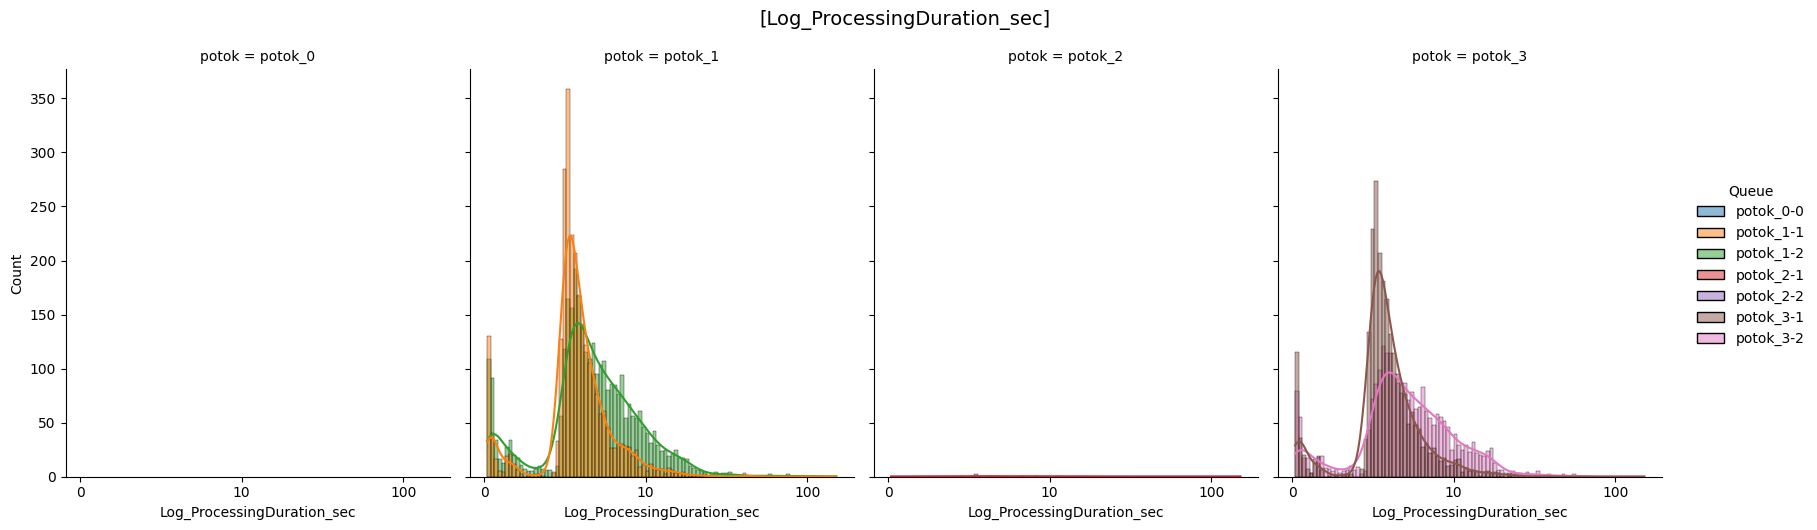

In [39]:
# Create a histogram with groupings based on Order Year
g = sns.displot(
    data=df_sample,
    x="Log_ProcessingDuration_sec",
    hue="Queue",
    kde=True,
    hue_order=HUE_ORDER,
    col="potok",
    col_order=COL_ORDER,
    aspect=.85
)

# Customize the plot
# g.set(xlim=(0, 6), ylim=(0, 350), xlabel="Log_ProcessingDuration_min", ylabel="Frequency")
g.set(xticks=[0, 1, 2], xticklabels=["0", "10", "100"])
g.fig.suptitle(f"[Log_ProcessingDuration_sec]", fontsize=14, y=1.05)
# Show the plot
plt.show()

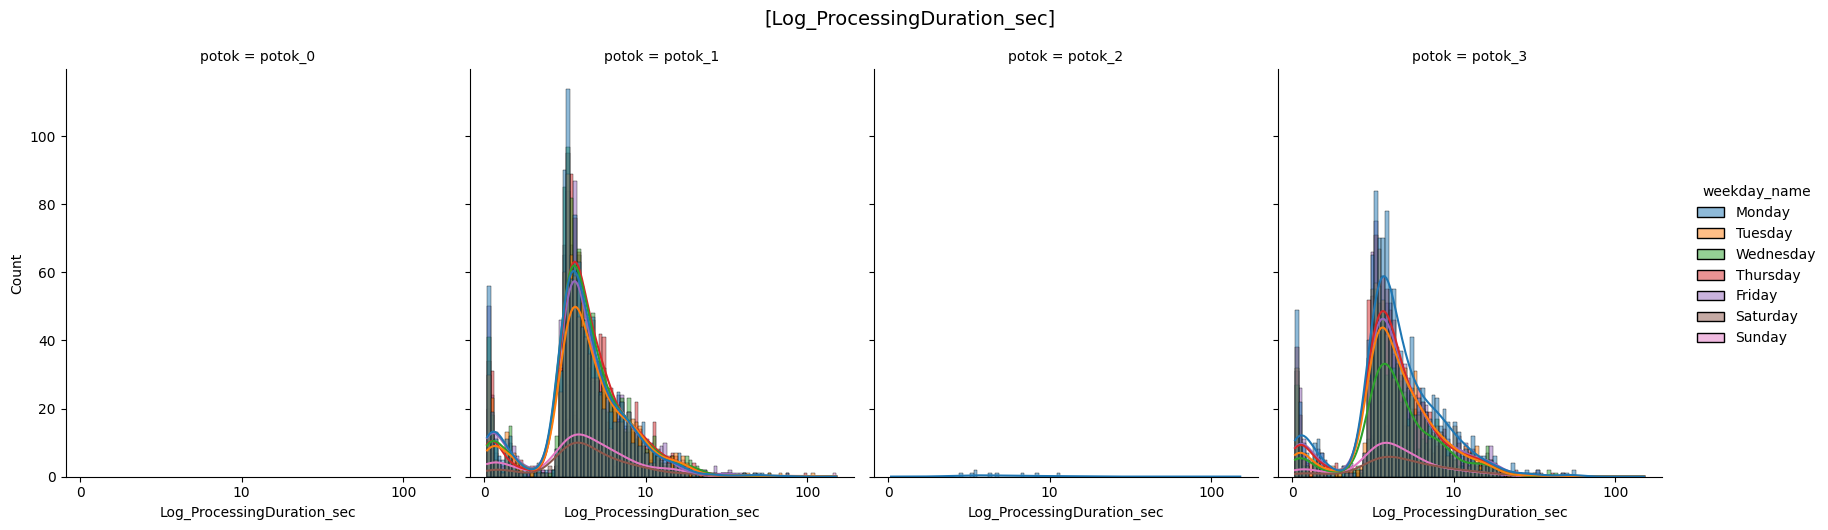

In [59]:
# Create a histogram with groupings based on Order Year
g = sns.displot(
    data=df_sample,
    x="Log_ProcessingDuration_sec",
    hue="weekday_name",
    kde=True,
    hue_order=WEEKDAY_ORDER,
    col="potok",
    col_order=COL_ORDER,
    aspect=.85
)

# Customize the plot
# g.set(xlim=(0, 6), ylim=(0, 350), xlabel="Log_ProcessingDuration_min", ylabel="Frequency")
g.set(xticks=[0, 1, 2], xticklabels=["0", "10", "100"])
g.fig.suptitle(f"[Log_ProcessingDuration_sec]", fontsize=14, y=1.05)
# Show the plot
plt.show()

Potok_0-0


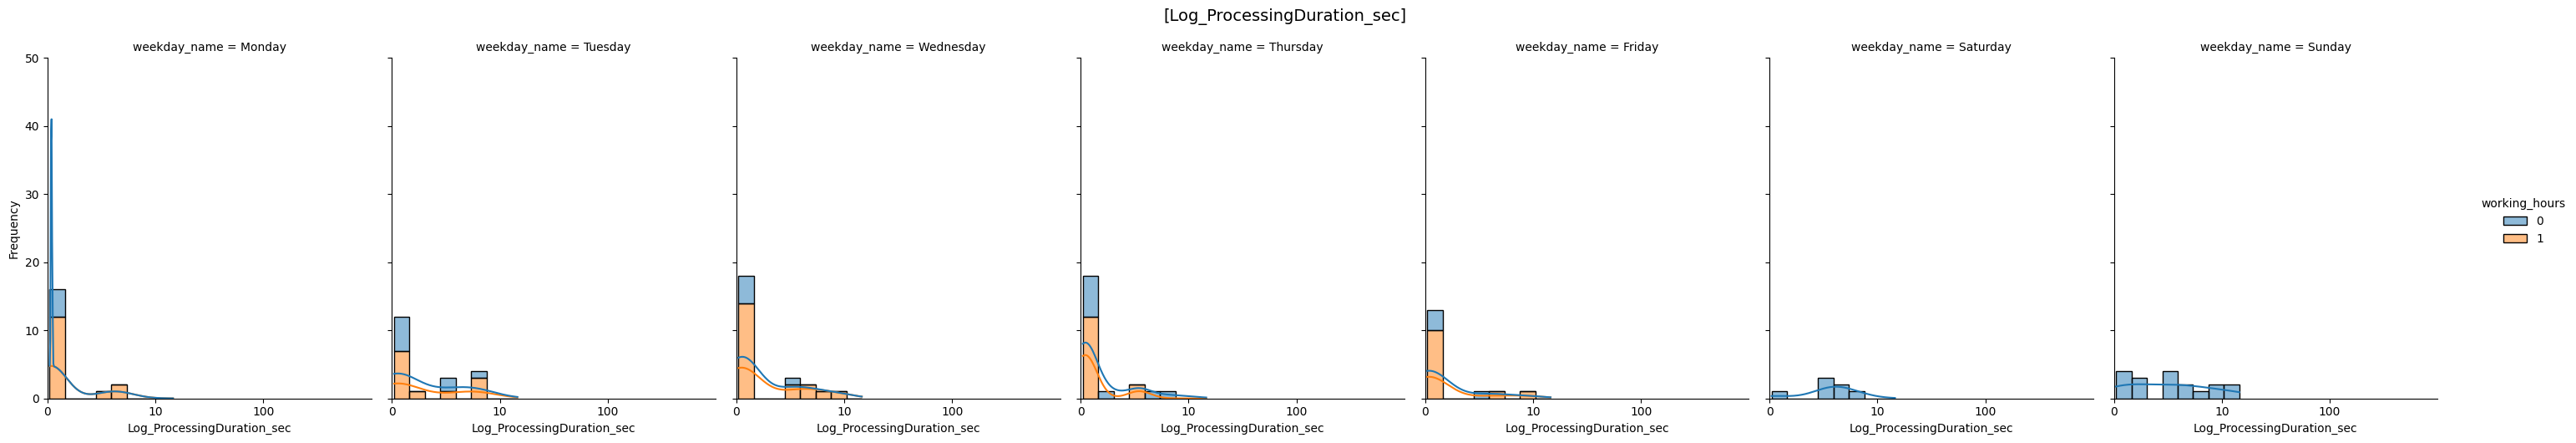

potok_1-1


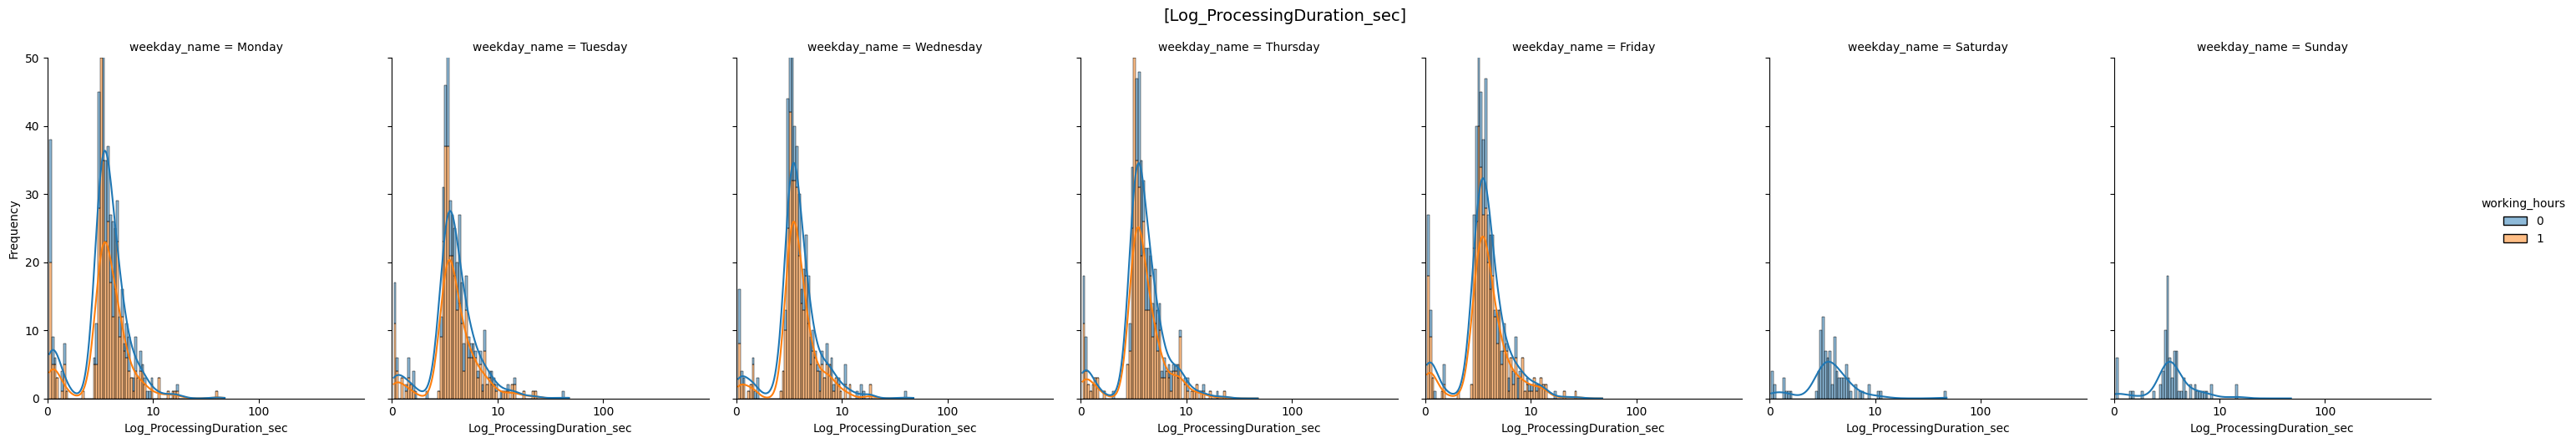

potok_1-2


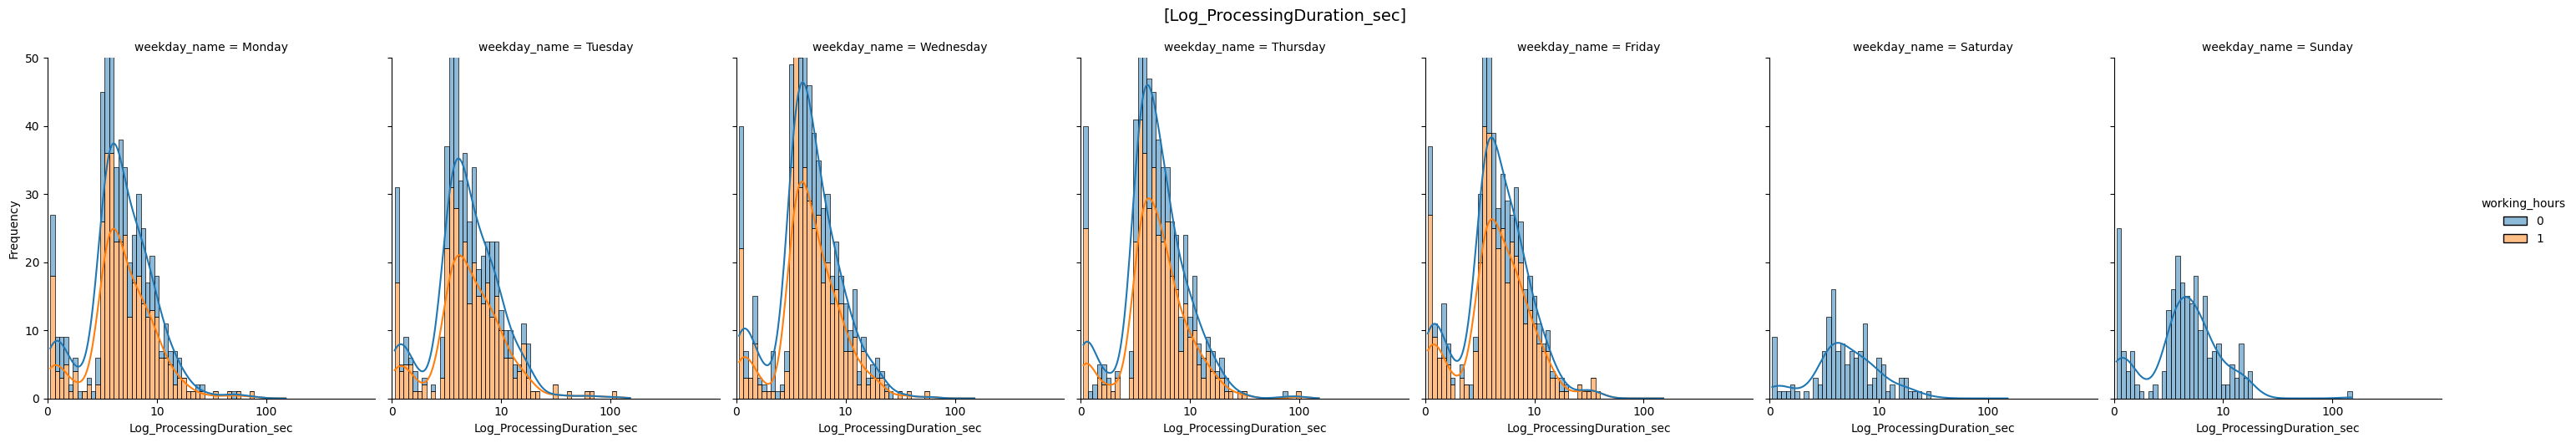

potok_2-1


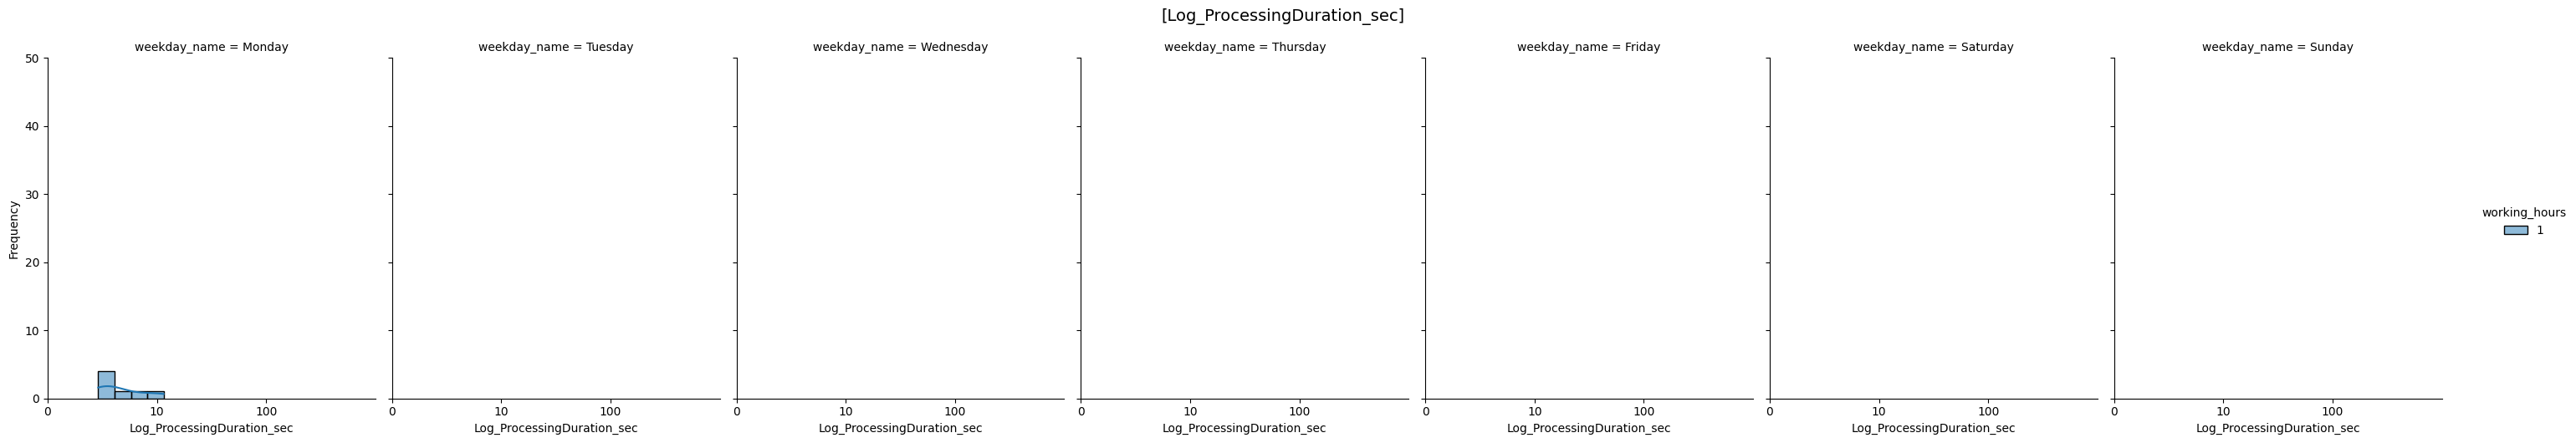

potok_2-2


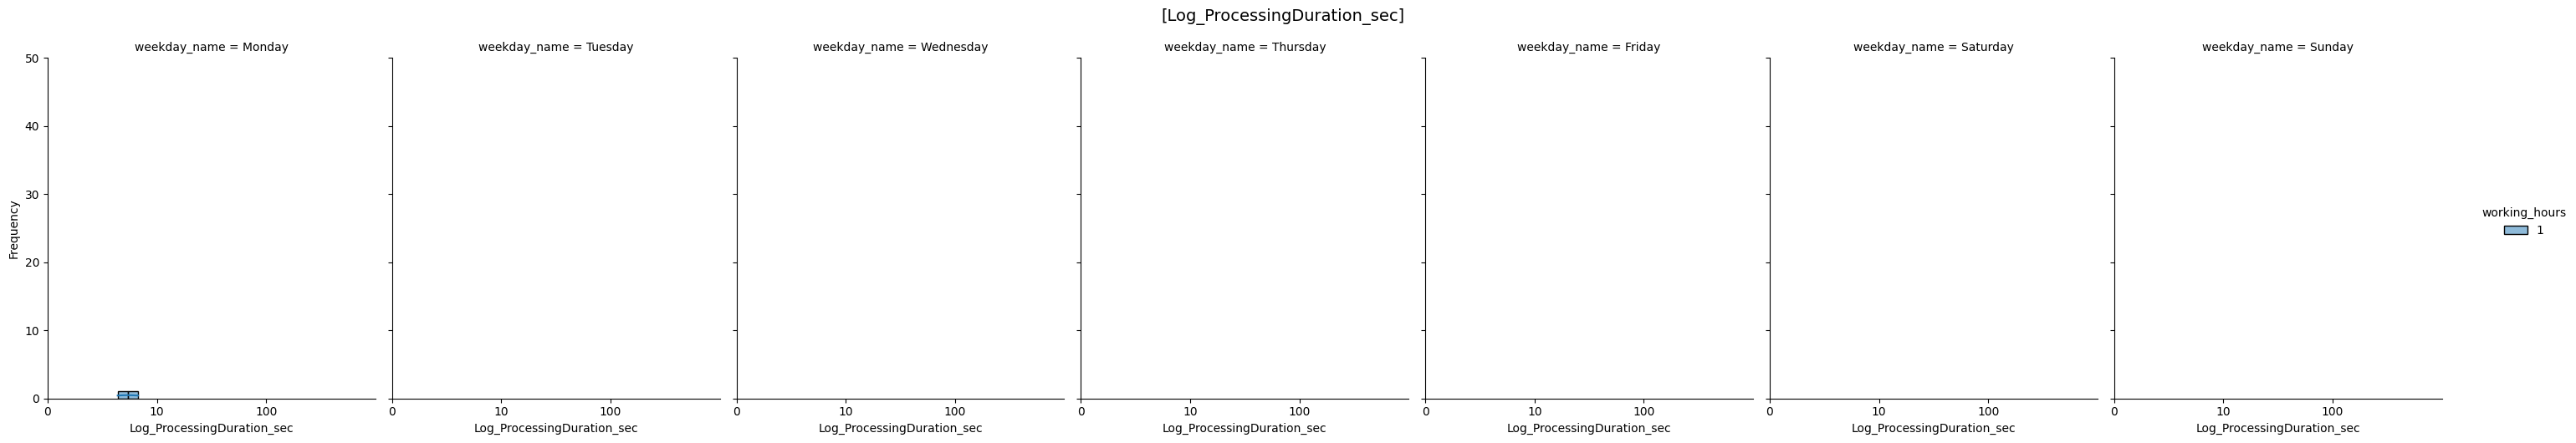

potok_3-1


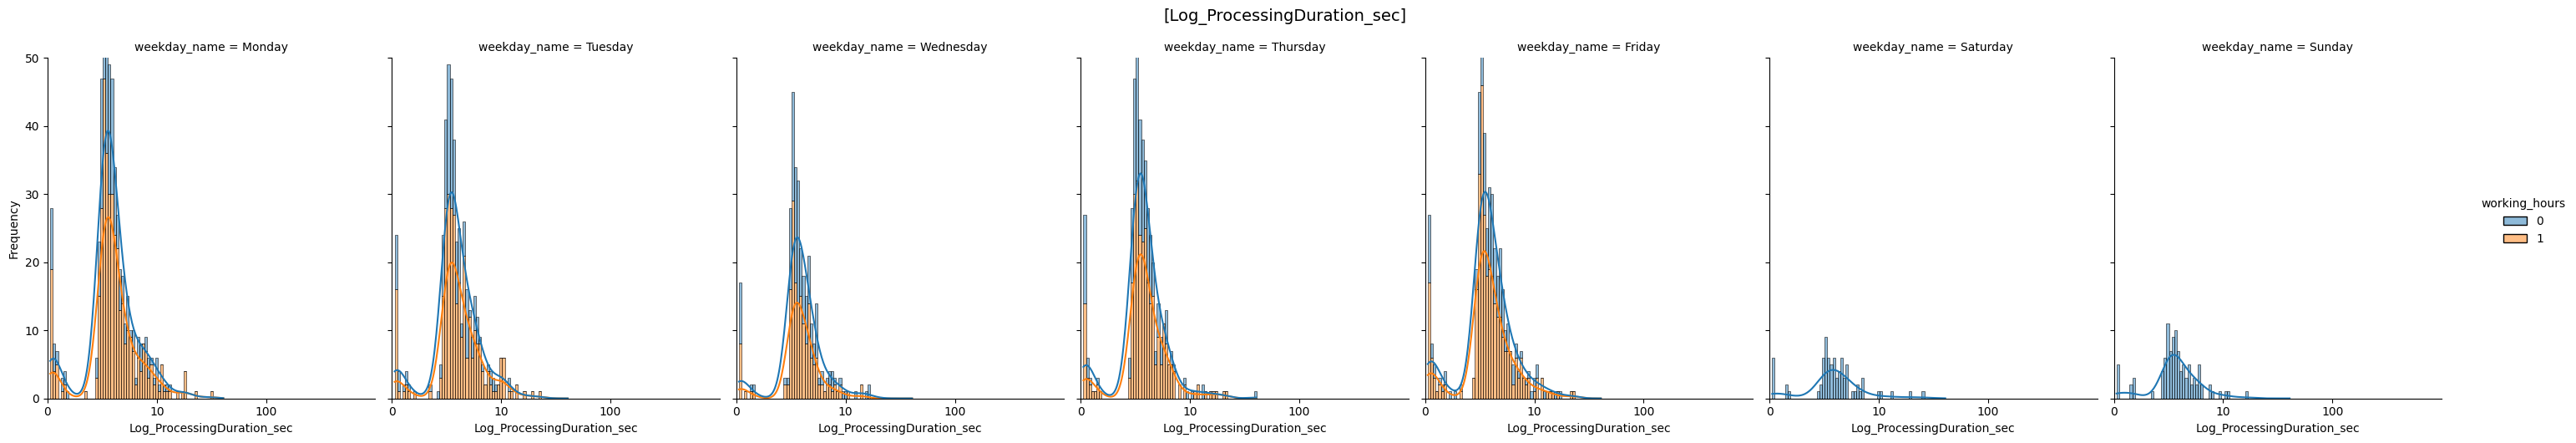

potok_3-2


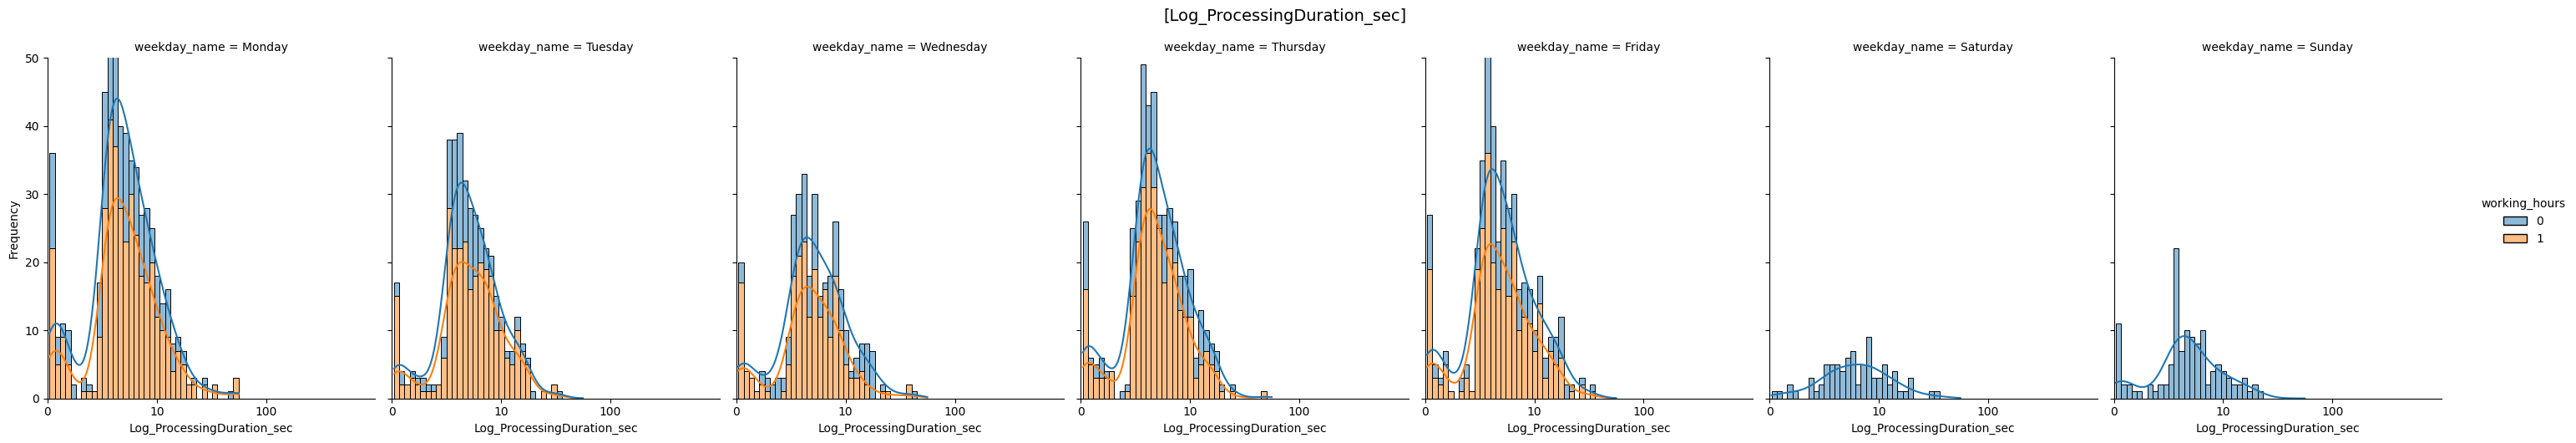

In [66]:
# Create a histogram with groupings based on Order Year
for i, v in enumerate(sorted(df["Queue"].unique())):
    print(v)
    g = sns.displot(
        data=df_sample[df_sample["Queue"] == v],
        x="Log_ProcessingDuration_sec",
        hue="working_hours",
        kde=True,
#         hue_order=HUE_ORDER,
        col="weekday_name",
        col_order=WEEKDAY_ORDER,
        aspect=.85,
        multiple="stack"
    )

    # Customize the plot
    g.set(xlim=(0, 3), ylim=(0, 50), xlabel="Log_ProcessingDuration_sec", ylabel="Frequency")
    g.set(xticks=[0, 1, 2], xticklabels=["0", "10", "100"])
    g.fig.suptitle(f"[Log_ProcessingDuration_sec]", fontsize=14, y=1.05)
    # Show the plot
    plt.show()

1


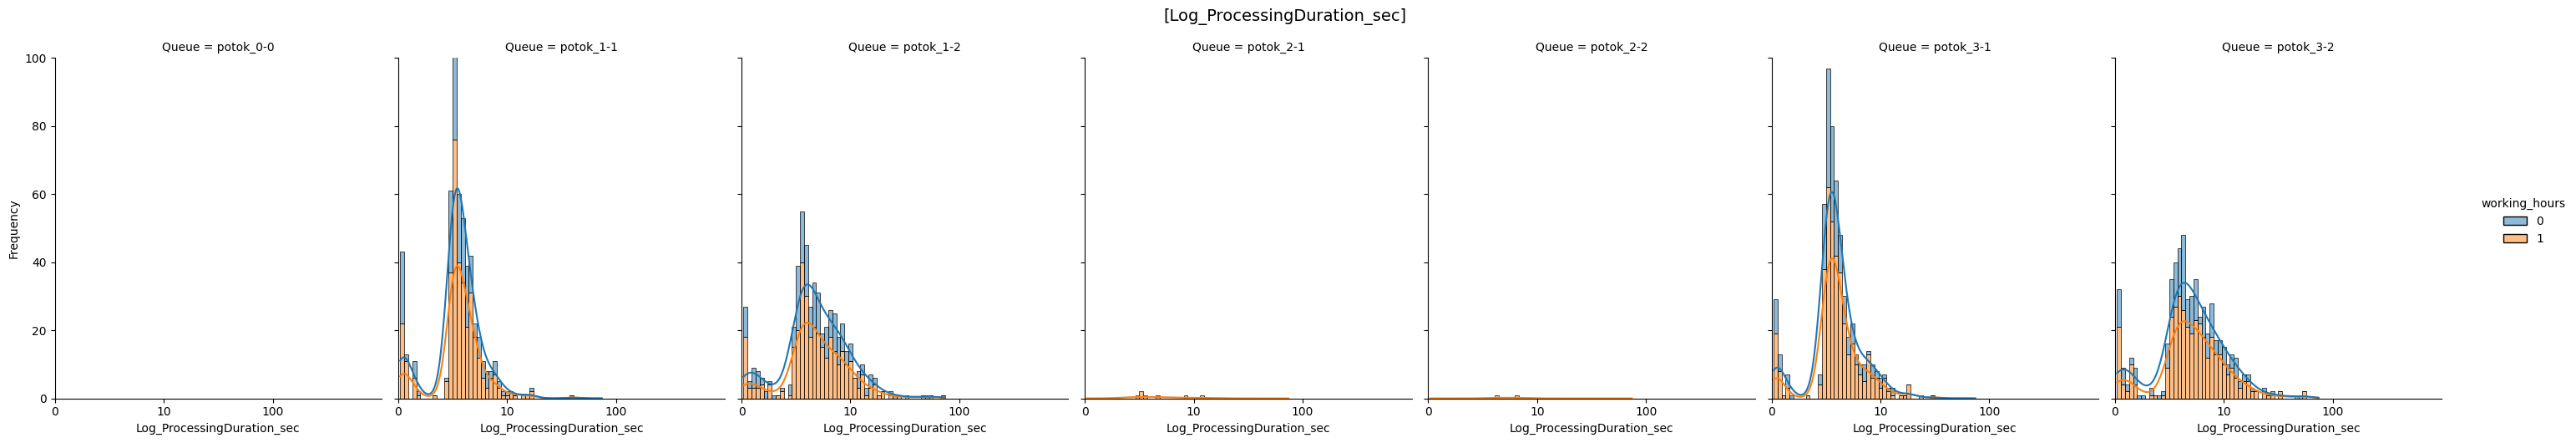

2


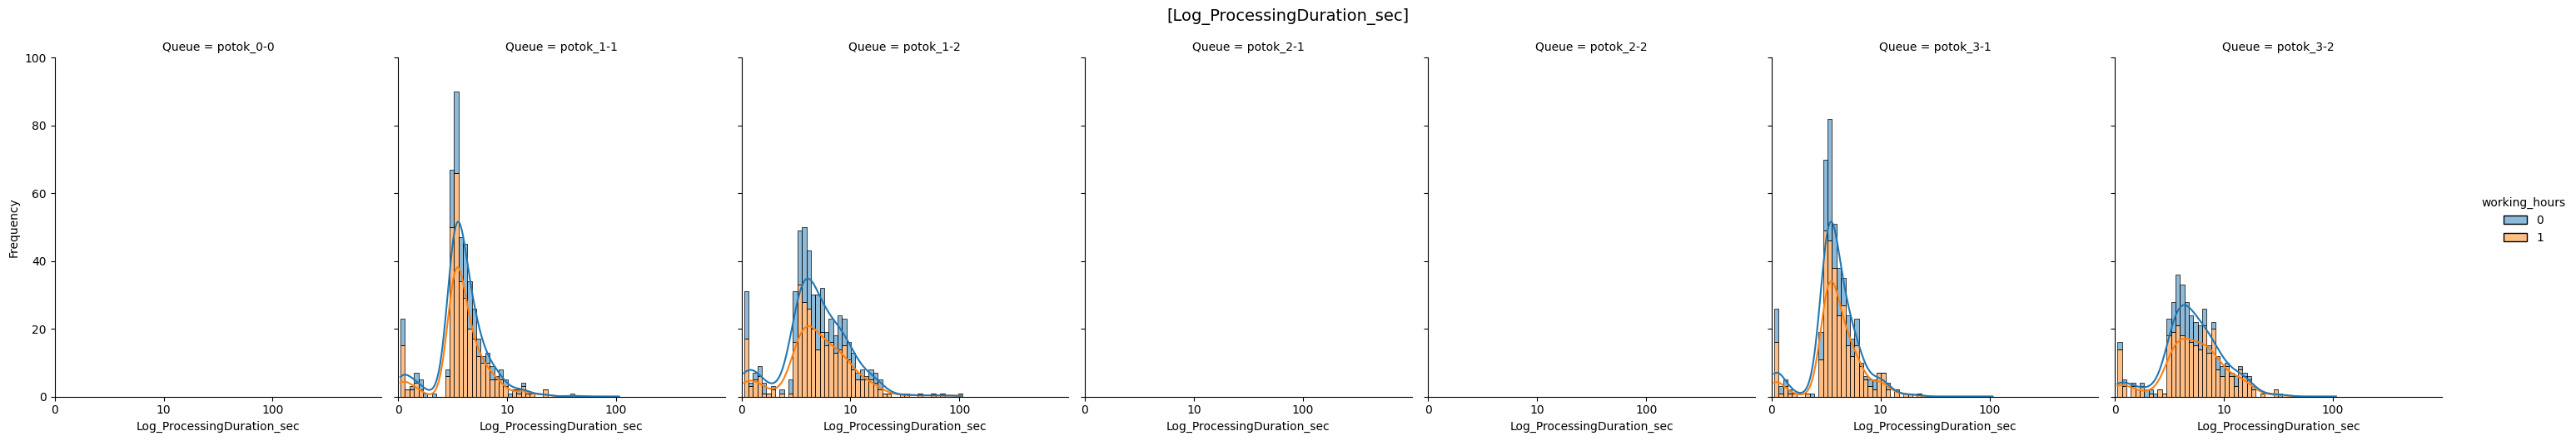

3


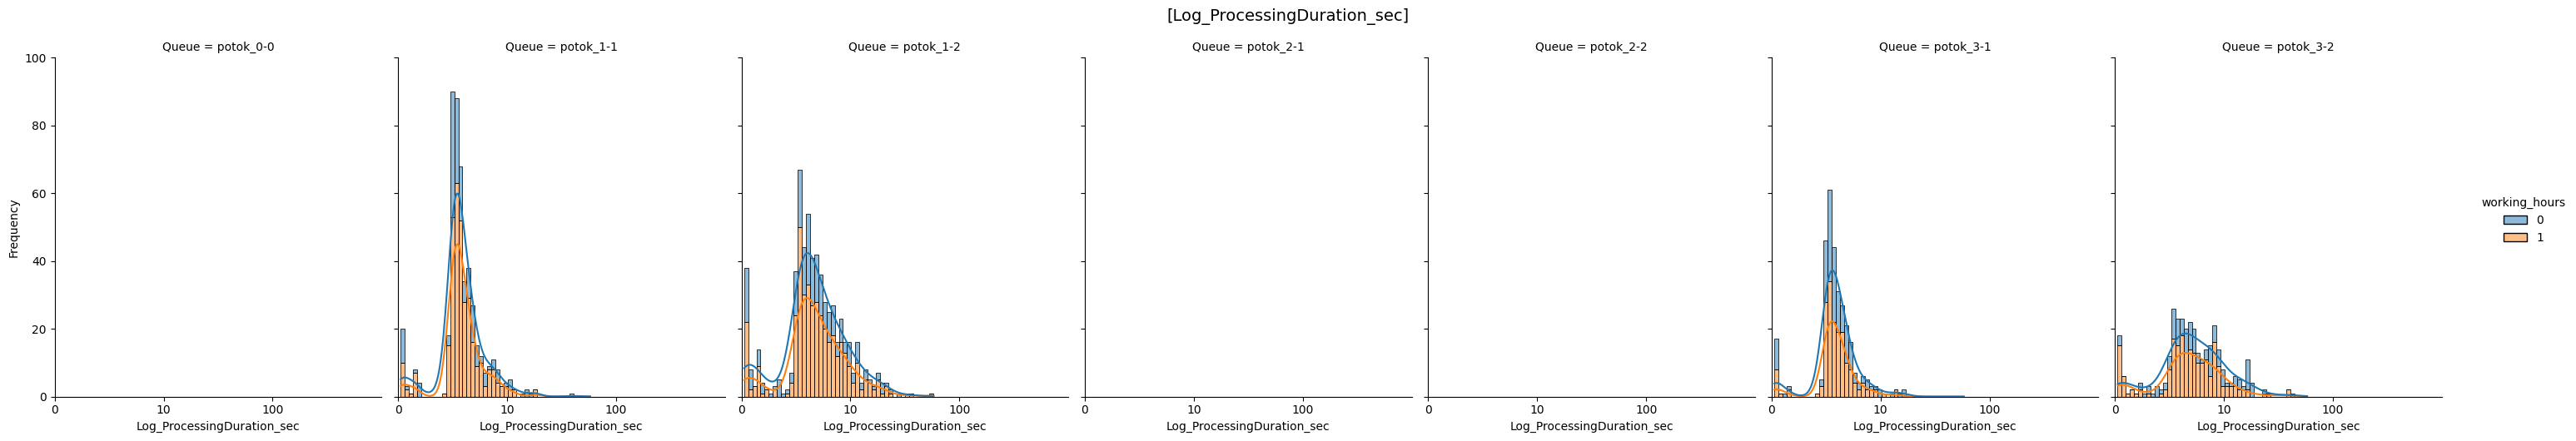

4


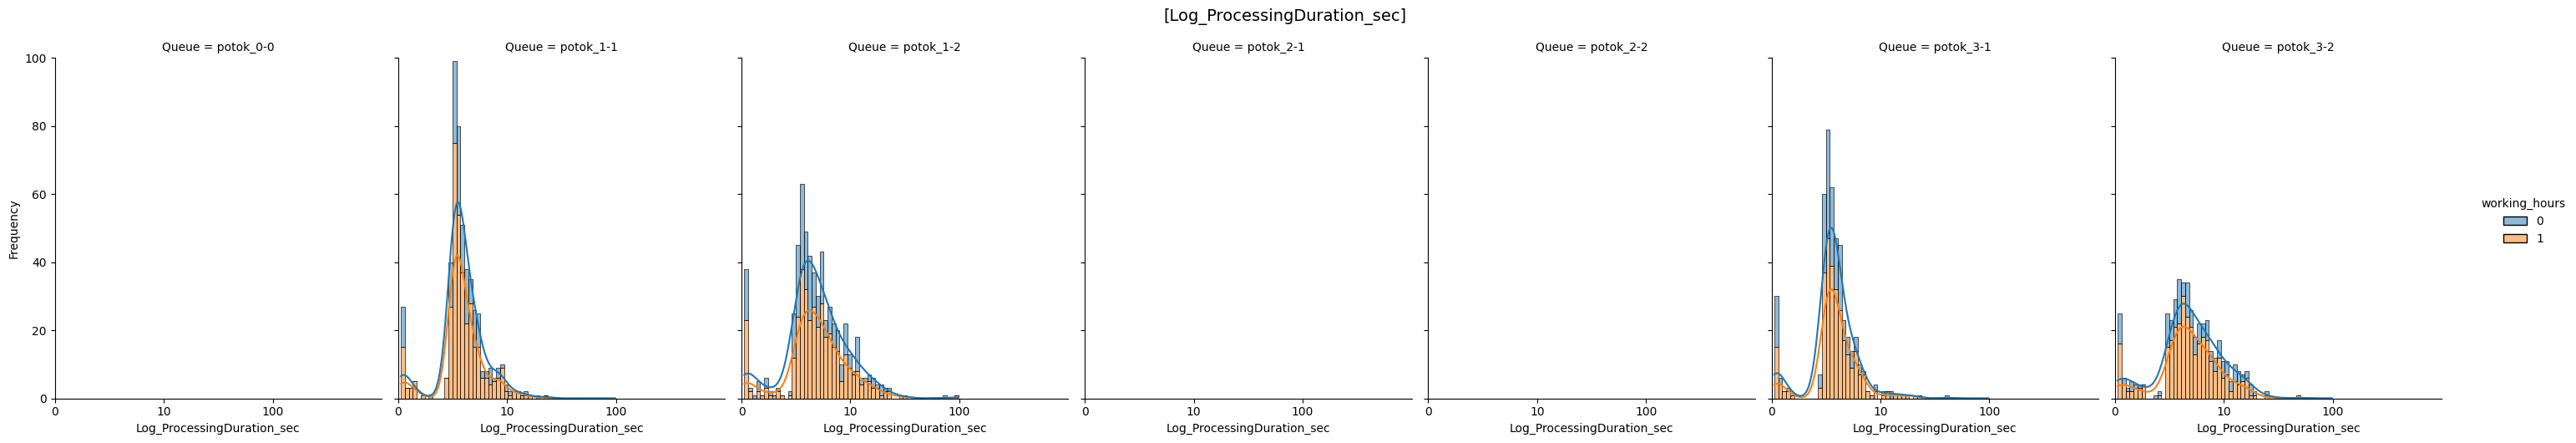

5


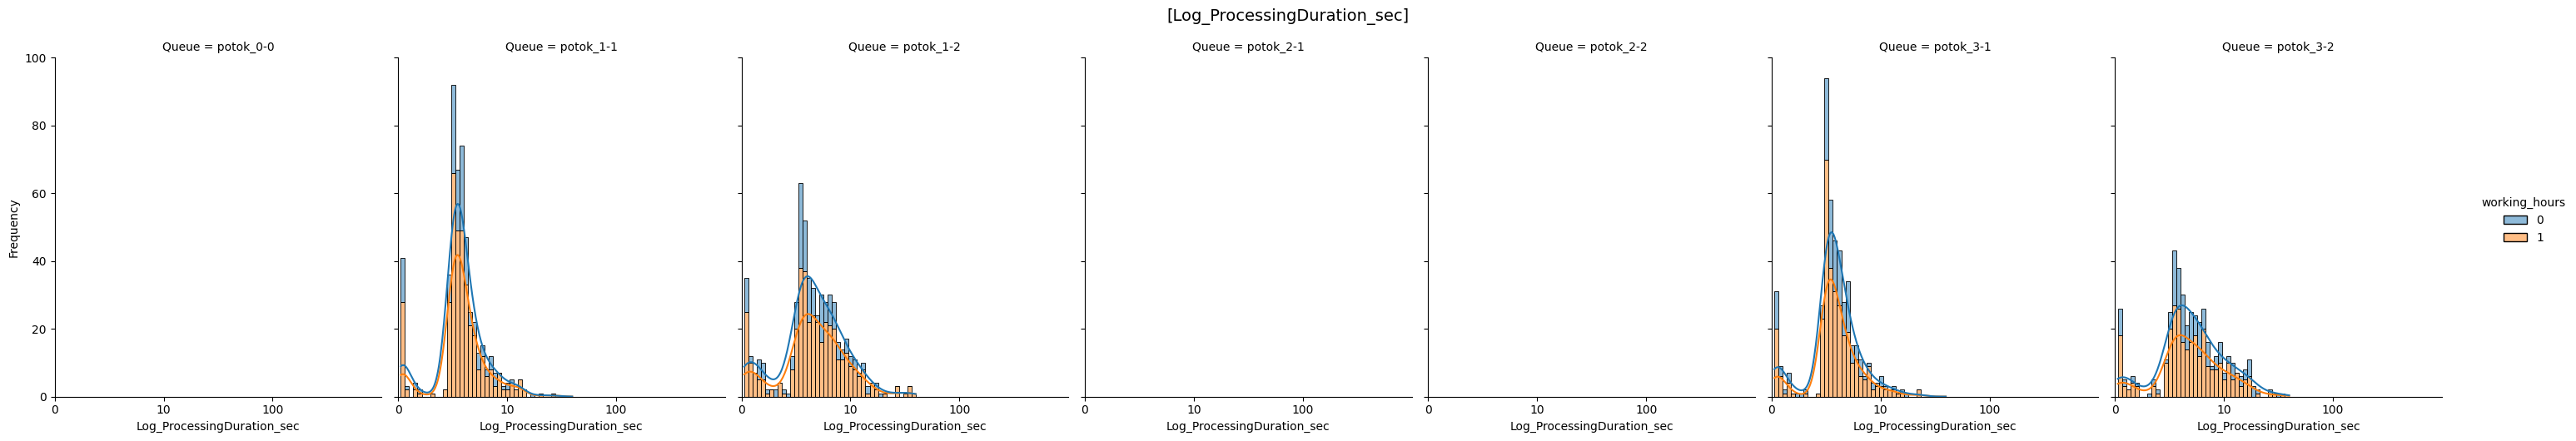

6


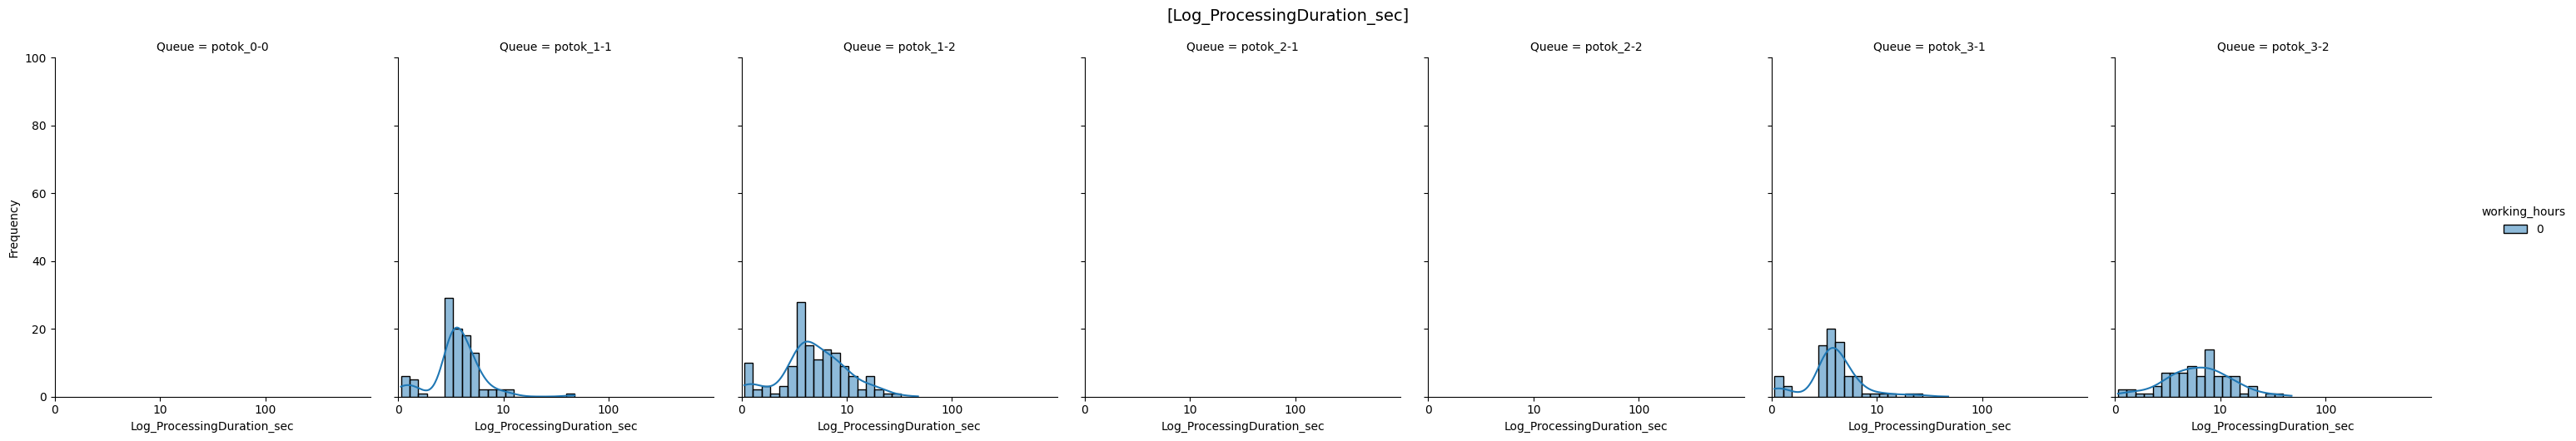

7


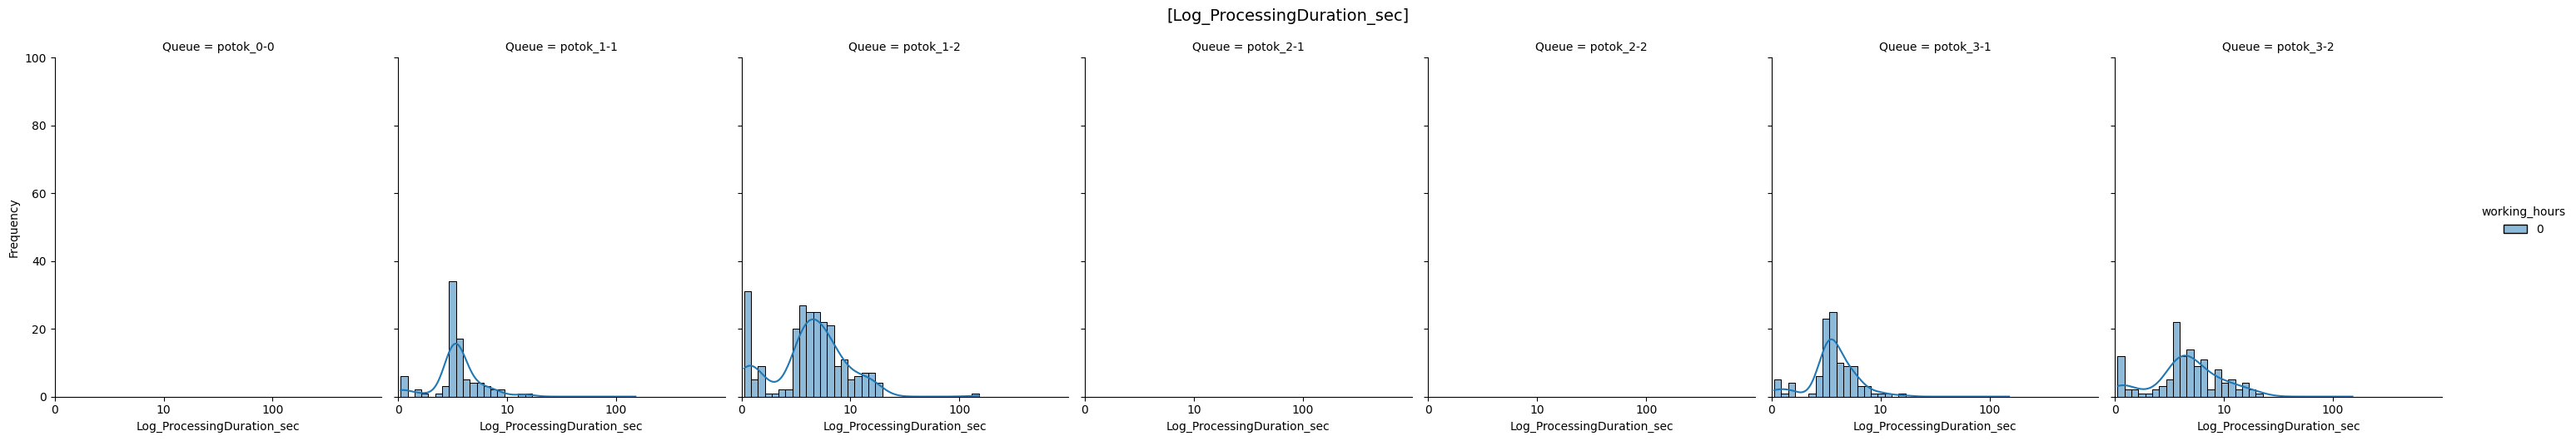

In [65]:
# Create a histogram with groupings based on Order Year
for i, v in enumerate(sorted(df["weekday"].unique())):
    print(v)
    g = sns.displot(
        data=df_sample[df_sample["weekday"] == v],
        x="Log_ProcessingDuration_sec",
        hue="working_hours",
        kde=True,
#         hue_order=WEEKDAY_ORDER,
        col="Queue",
        col_order=HUE_ORDER,
        aspect=.85,
        multiple="stack"
    )

    # Customize the plot
    g.set(xlim=(0, 3), ylim=(0, 100), xlabel="Log_ProcessingDuration_sec", ylabel="Frequency")
    g.set(xticks=[0, 1, 2], xticklabels=["0", "10", "100"])
    g.fig.suptitle(f"[Log_ProcessingDuration_sec]", fontsize=14, y=1.05)
    # Show the plot
    plt.show()

### Duration

In [ ]:
# # Create a histogram with groupings based on Order Year
# g = sns.displot(
#     data=df_sample,
#     x="Duration_sec",
#     hue="Queue",
#     kde=True,
#     hue_order=HUE_ORDER,
#     col="potok",
#     col_order=COL_ORDER,
#     aspect=.85
# )

# # Customize the plot
# g.set(xlim=(0, 6), ylim=(0, 100), xlabel="Log_ProcessingDuration_min", ylabel="Frequency")
# g.set(xticks=[0, 1, 2, 3, 4, 5], xticklabels=["0", "10", "100", "1000", "1000", "10000"])
# g.fig.suptitle(f"[Duration_sec]", fontsize=14, y=1.05)
# # Show the plot
# plt.show()

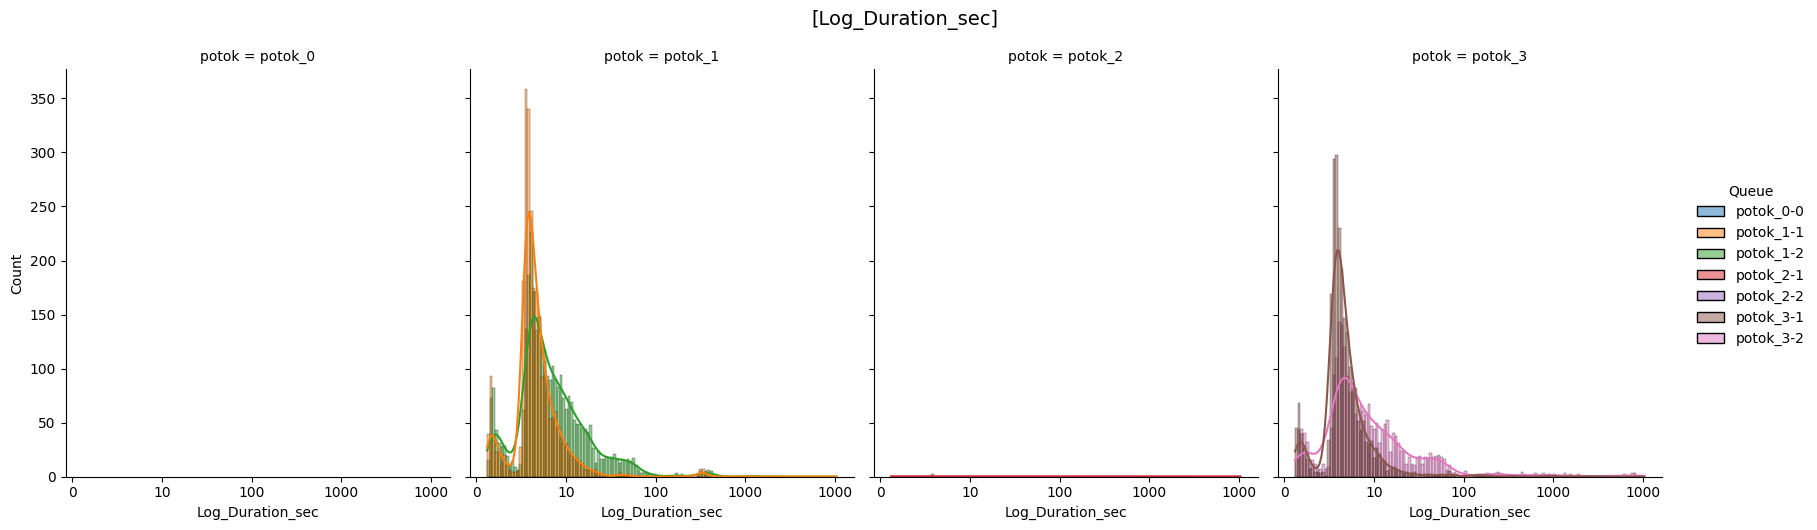

In [55]:
# Create a histogram with groupings based on Order Year
g = sns.displot(
    data=df_sample,
    x="Log_Duration_sec",
    hue="Queue",
    kde=True,
    hue_order=HUE_ORDER,
    col="potok",
    col_order=COL_ORDER,
    aspect=.85
)

# Customize the plot
# g.set(xlim=(0, 6), ylim=(0, 350), xlabel="Log_ProcessingDuration_min", ylabel="Frequency")
g.set(xticks=[0, 1, 2, 3, 4], xticklabels=["0", "10", "100", "1000", "1000"])
g.fig.suptitle(f"[Log_Duration_sec]", fontsize=14, y=1.05)
# Show the plot
plt.show()

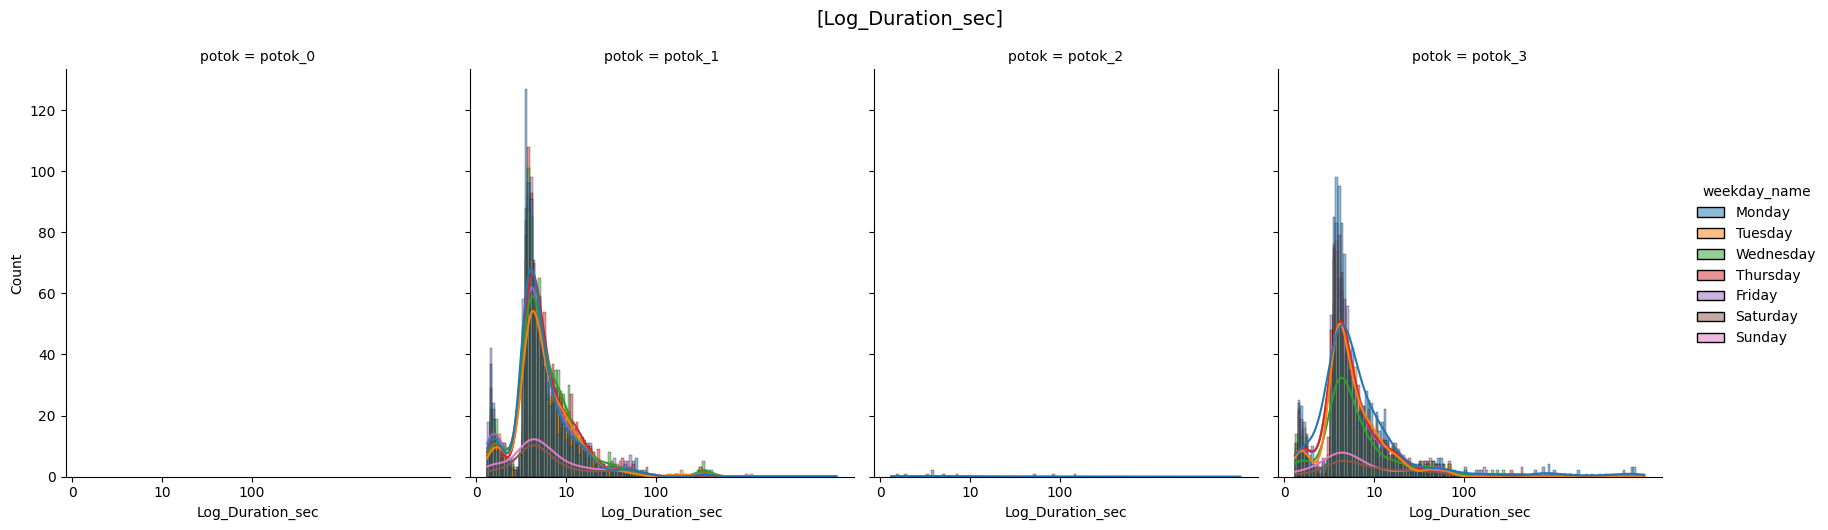

In [62]:
# Create a histogram with groupings based on Order Year
g = sns.displot(
    data=df_sample,
    x="Log_Duration_sec",
    hue="weekday_name",
    kde=True,
    hue_order=WEEKDAY_ORDER,
    col="potok",
    col_order=COL_ORDER,
    aspect=.85    
)

# Customize the plot
# g.set(xlim=(0, 6), ylim=(0, 350), xlabel="Log_ProcessingDuration_min", ylabel="Frequency")
g.set(xticks=[0, 1, 2], xticklabels=["0", "10", "100"])
g.fig.suptitle(f"[Log_Duration_sec]", fontsize=14, y=1.05)
# Show the plot
plt.show()

Potok_0-0


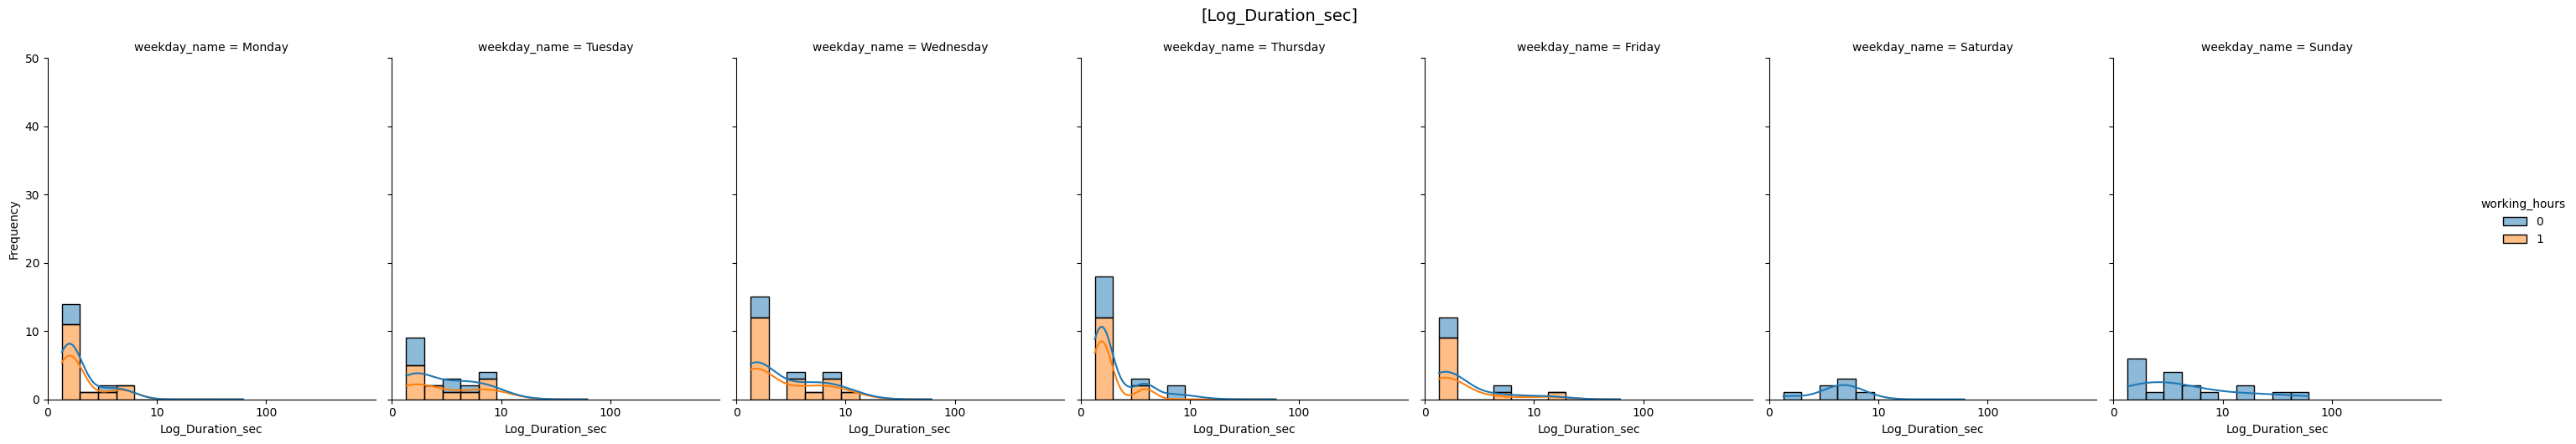

potok_1-1


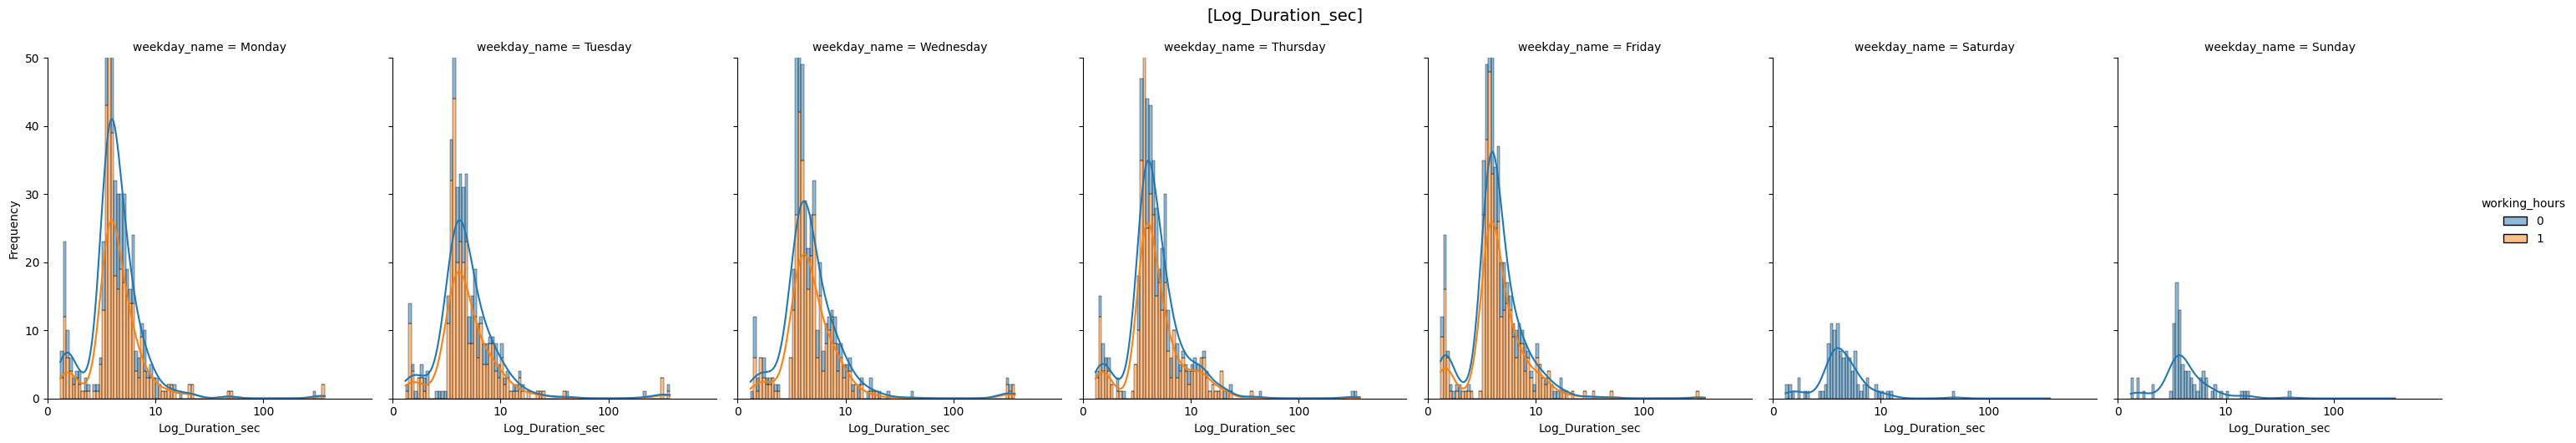

potok_1-2


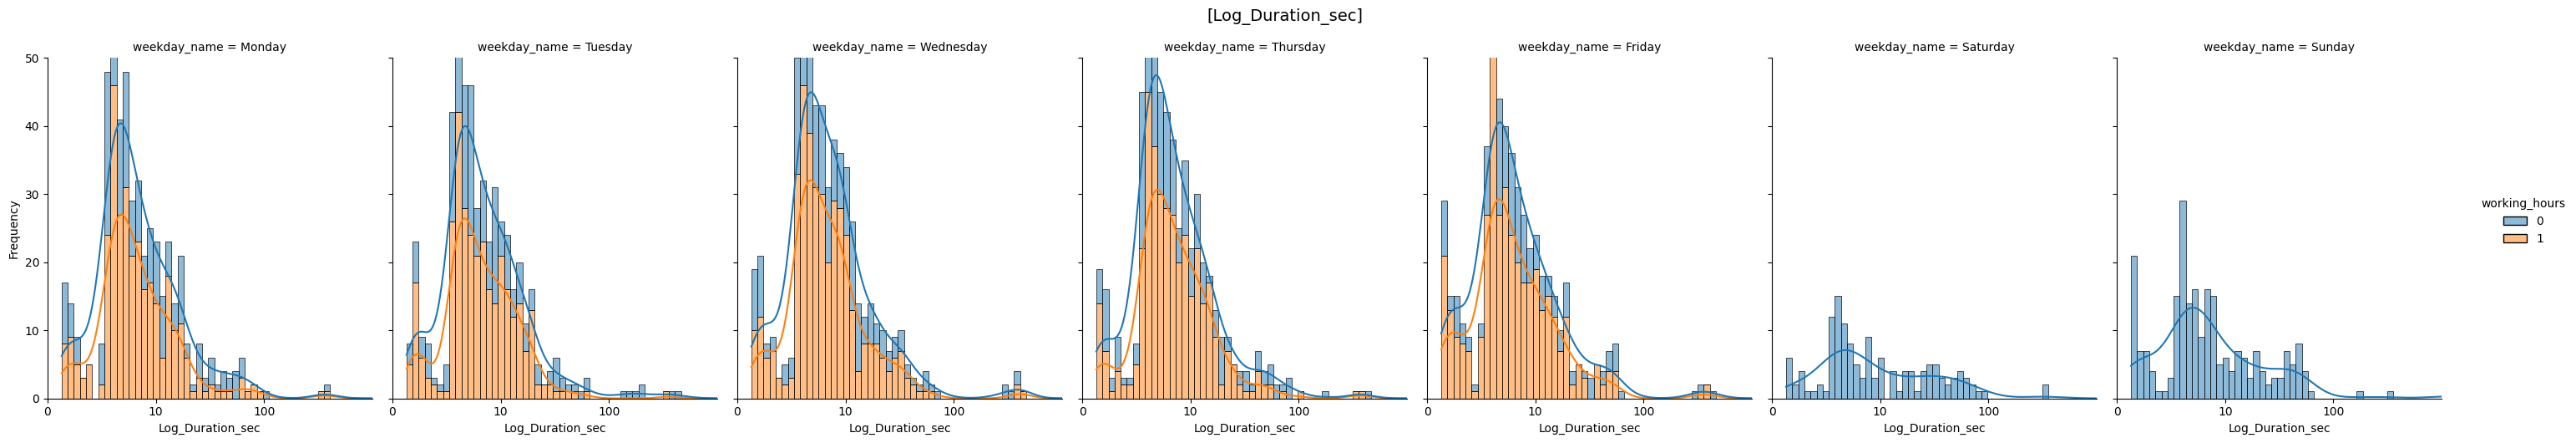

potok_2-1


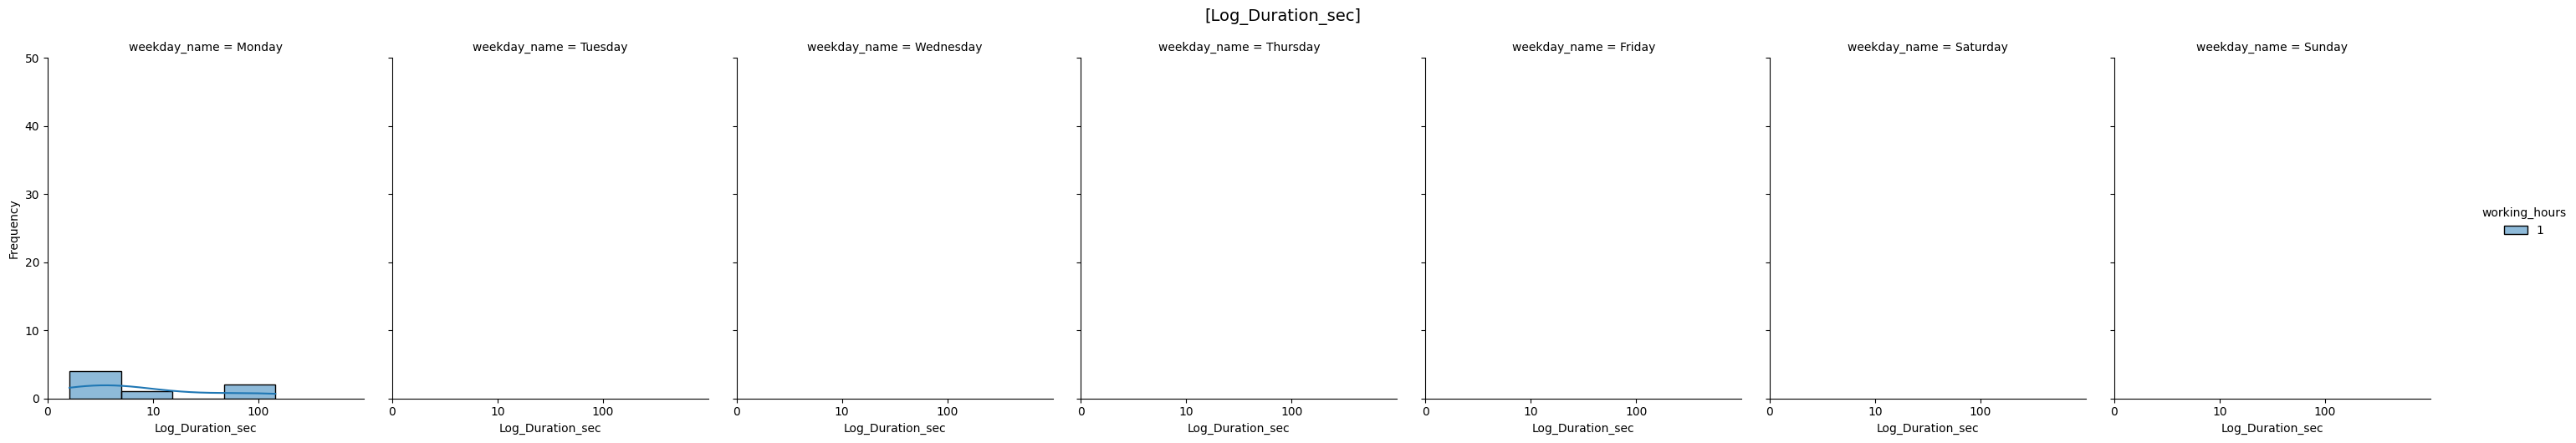

potok_2-2


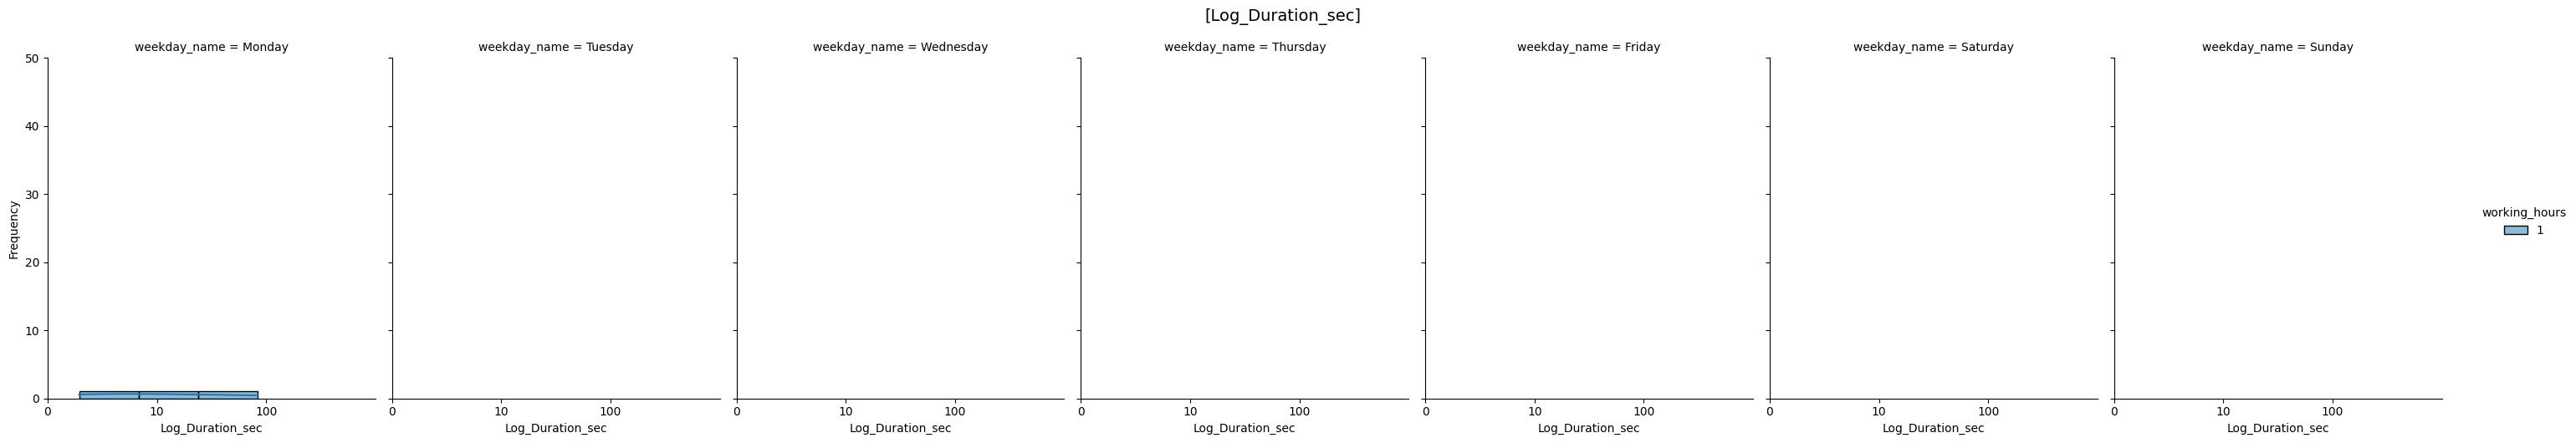

potok_3-1


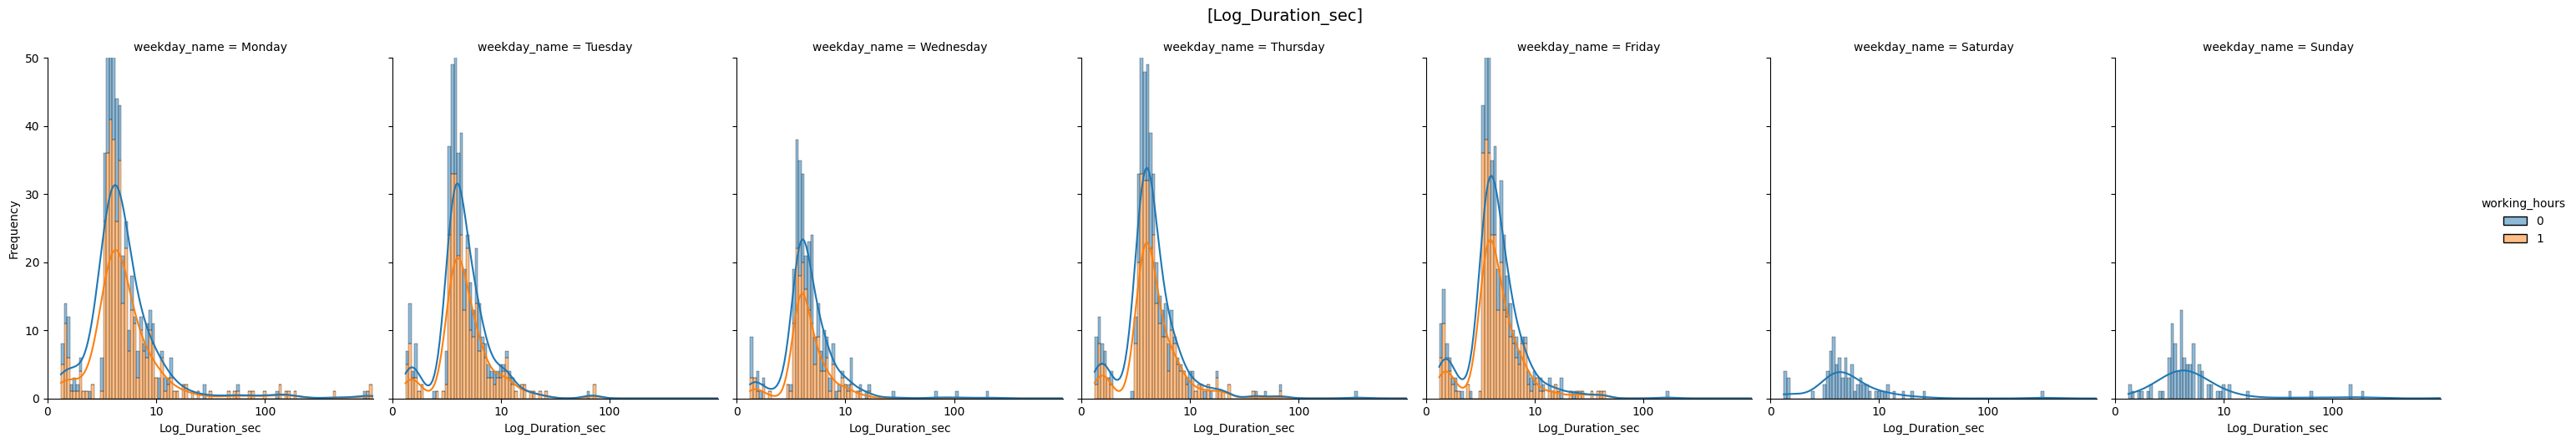

potok_3-2


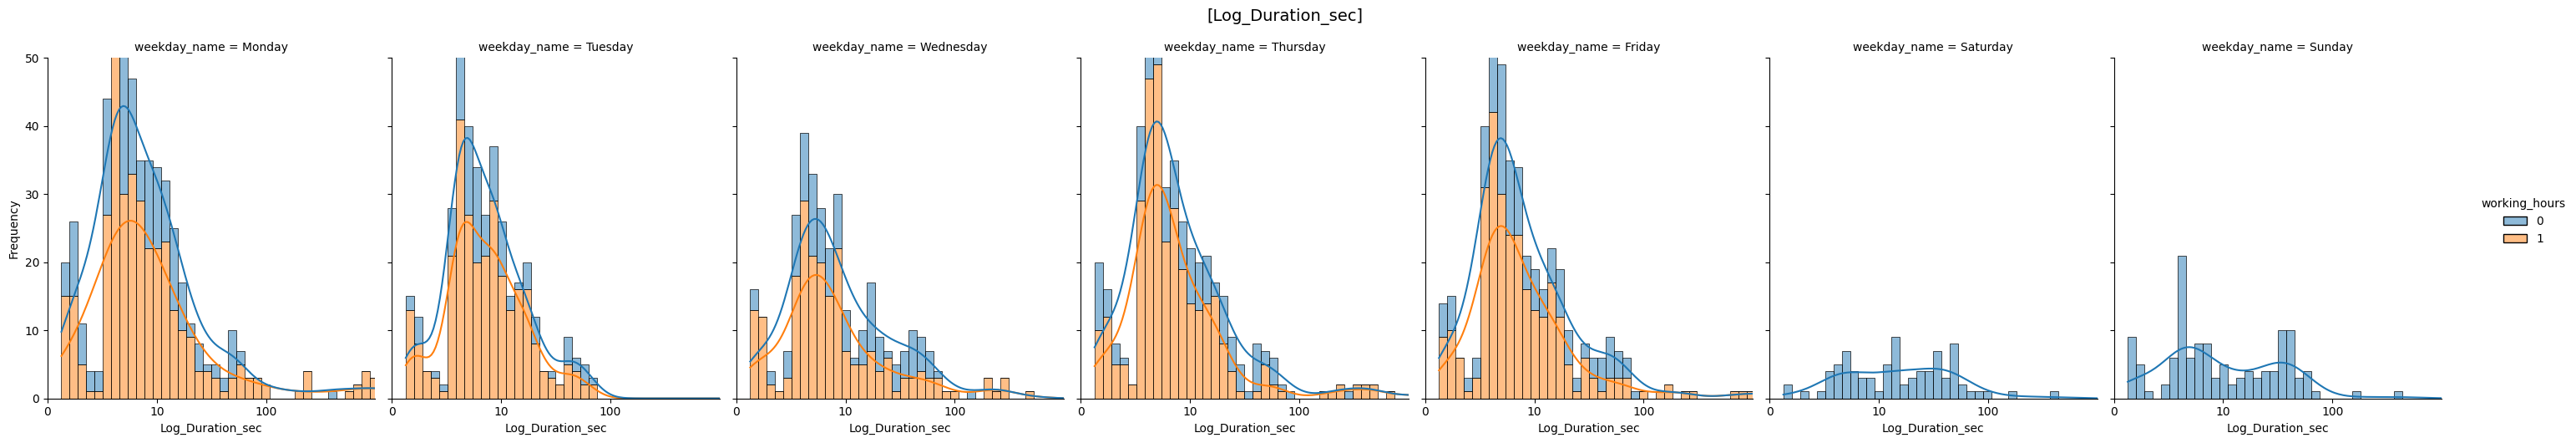

In [63]:
# Create a histogram with groupings based on Order Year
for i, v in enumerate(sorted(df["Queue"].unique())):
    print(v)
    g = sns.displot(
        data=df_sample[df_sample["Queue"] == v],
        x="Log_Duration_sec",
        hue="working_hours",
        kde=True,
#         hue_order=HUE_ORDER,
        col="weekday_name",
        col_order=WEEKDAY_ORDER,
        aspect=.85,
        multiple="stack"
    )

    # Customize the plot
    g.set(xlim=(0, 3), ylim=(0, 50), xlabel="Log_Duration_sec", ylabel="Frequency")
    g.set(xticks=[0, 1, 2], xticklabels=["0", "10", "100"])
    g.fig.suptitle(f"[Log_Duration_sec]", fontsize=14, y=1.05)
    # Show the plot
    plt.show()

1


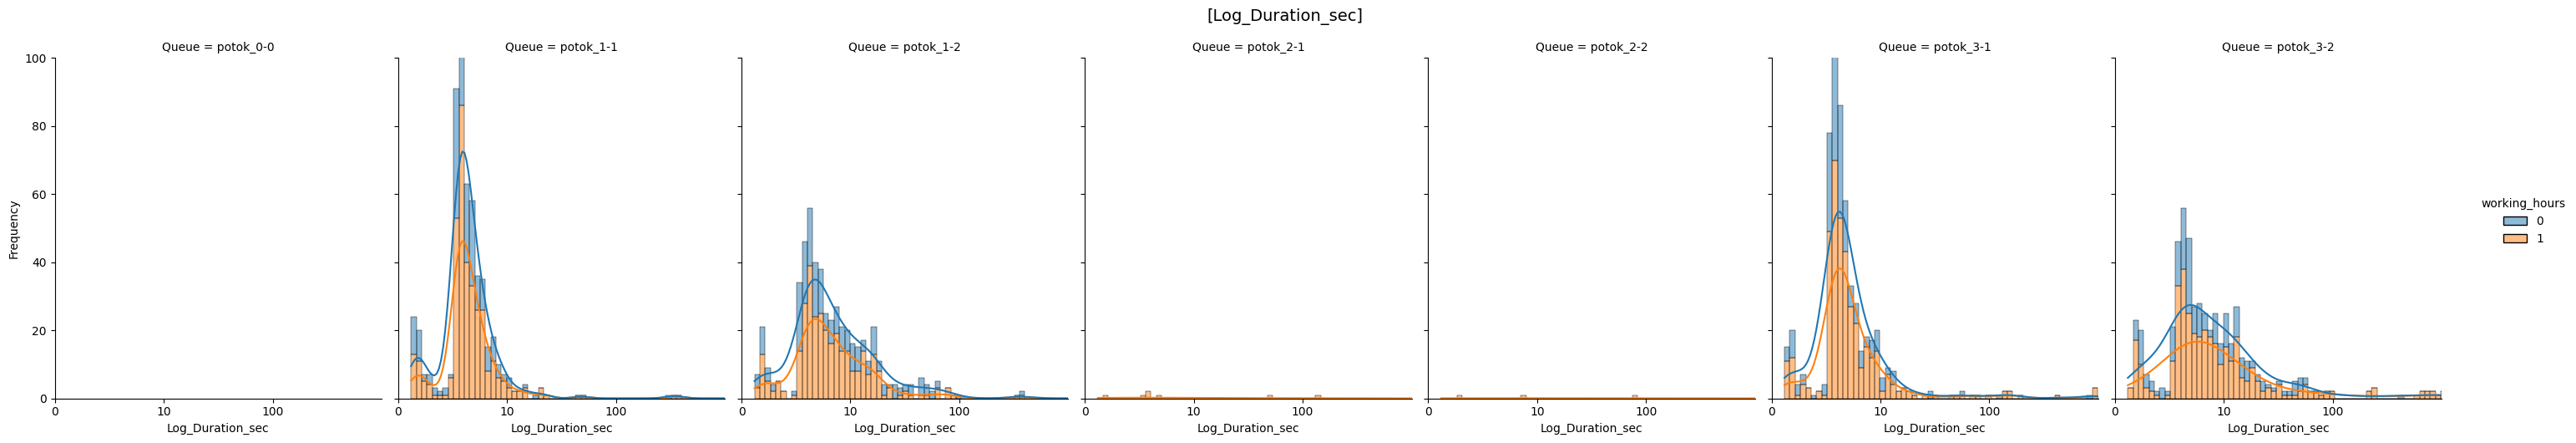

2


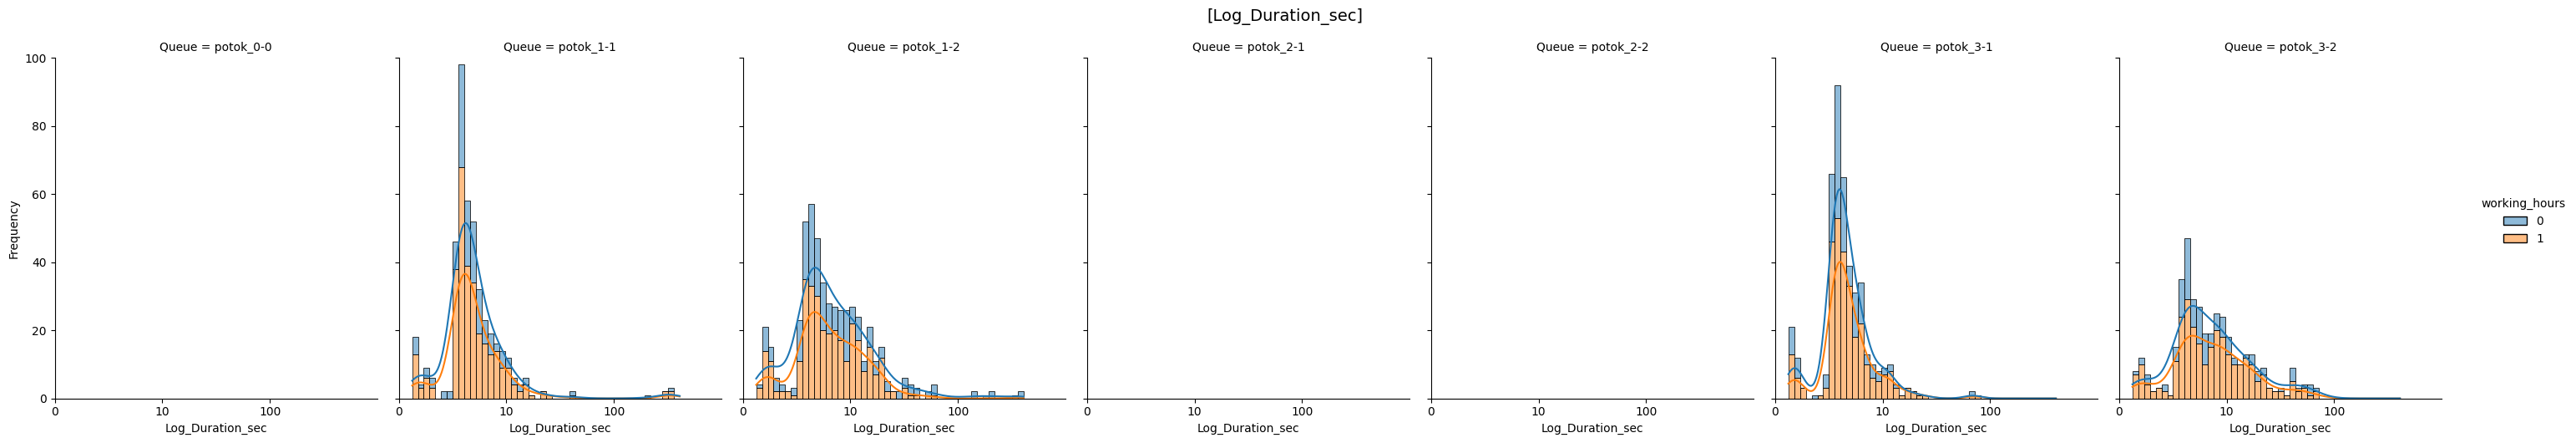

3


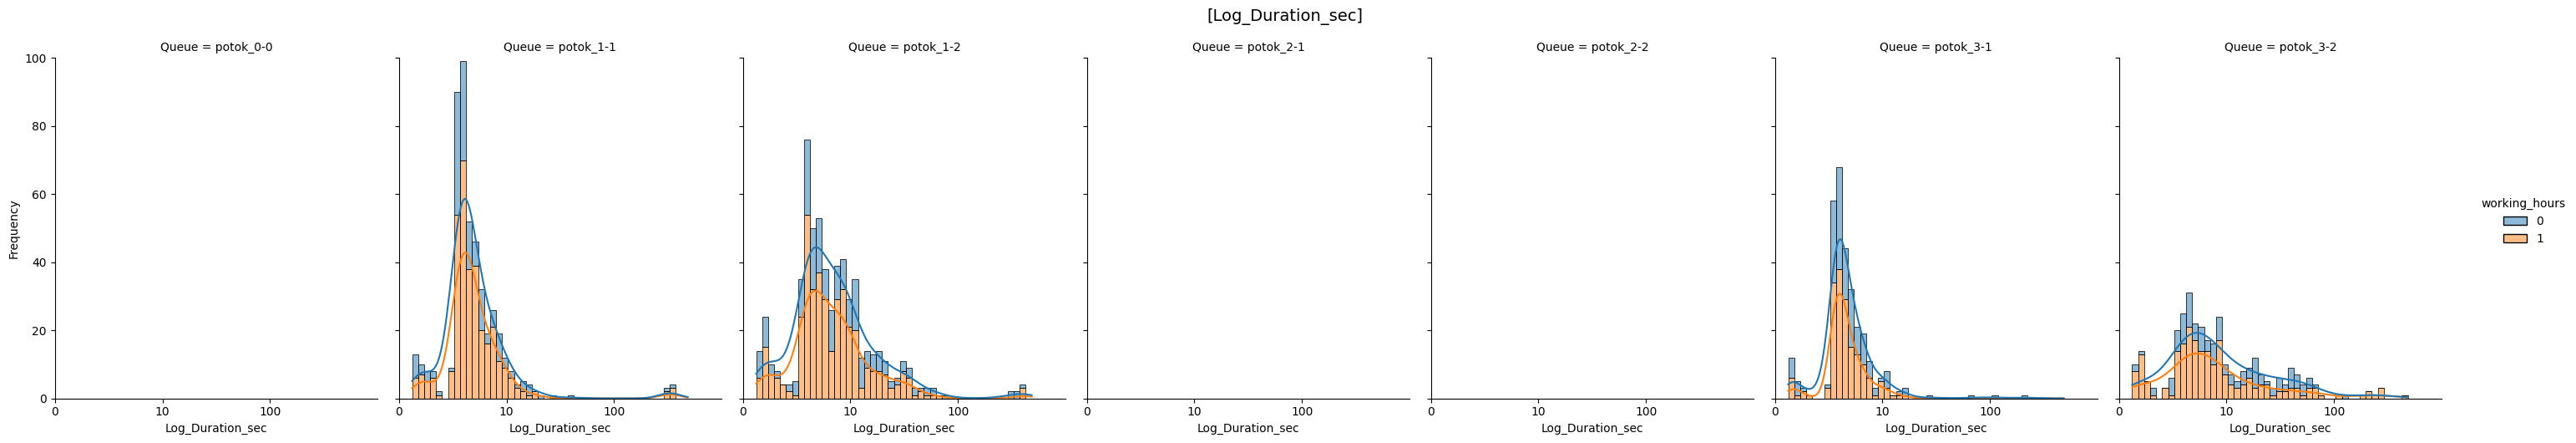

4


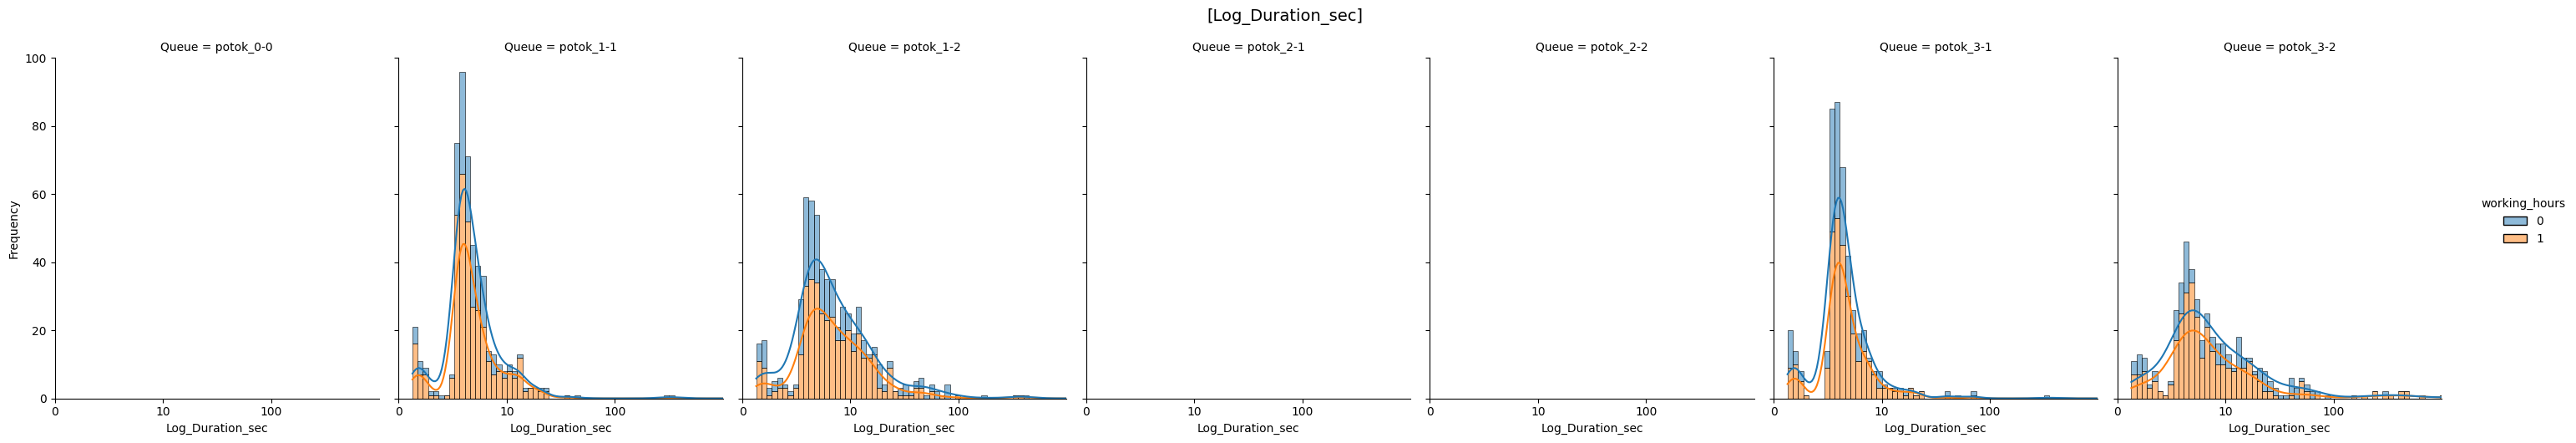

5


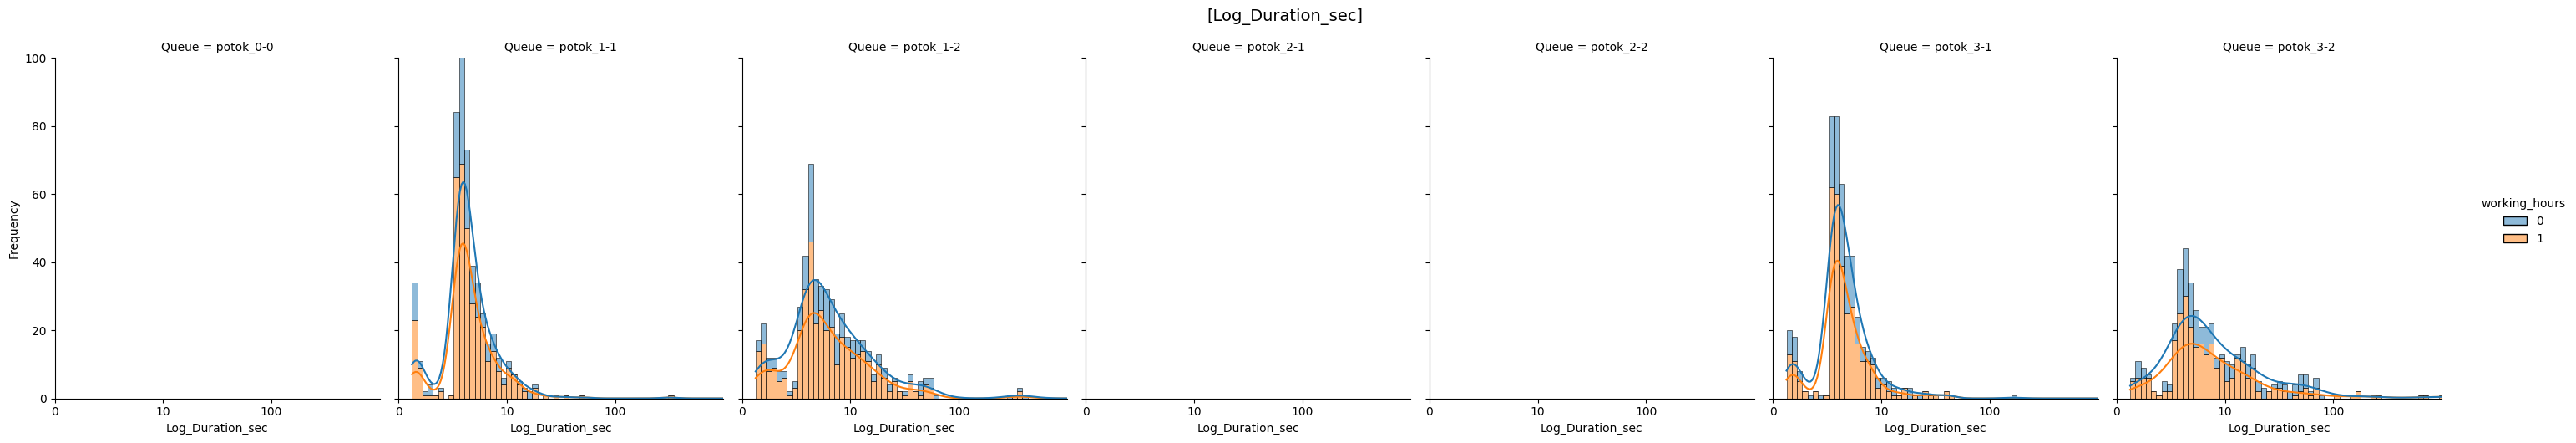

6


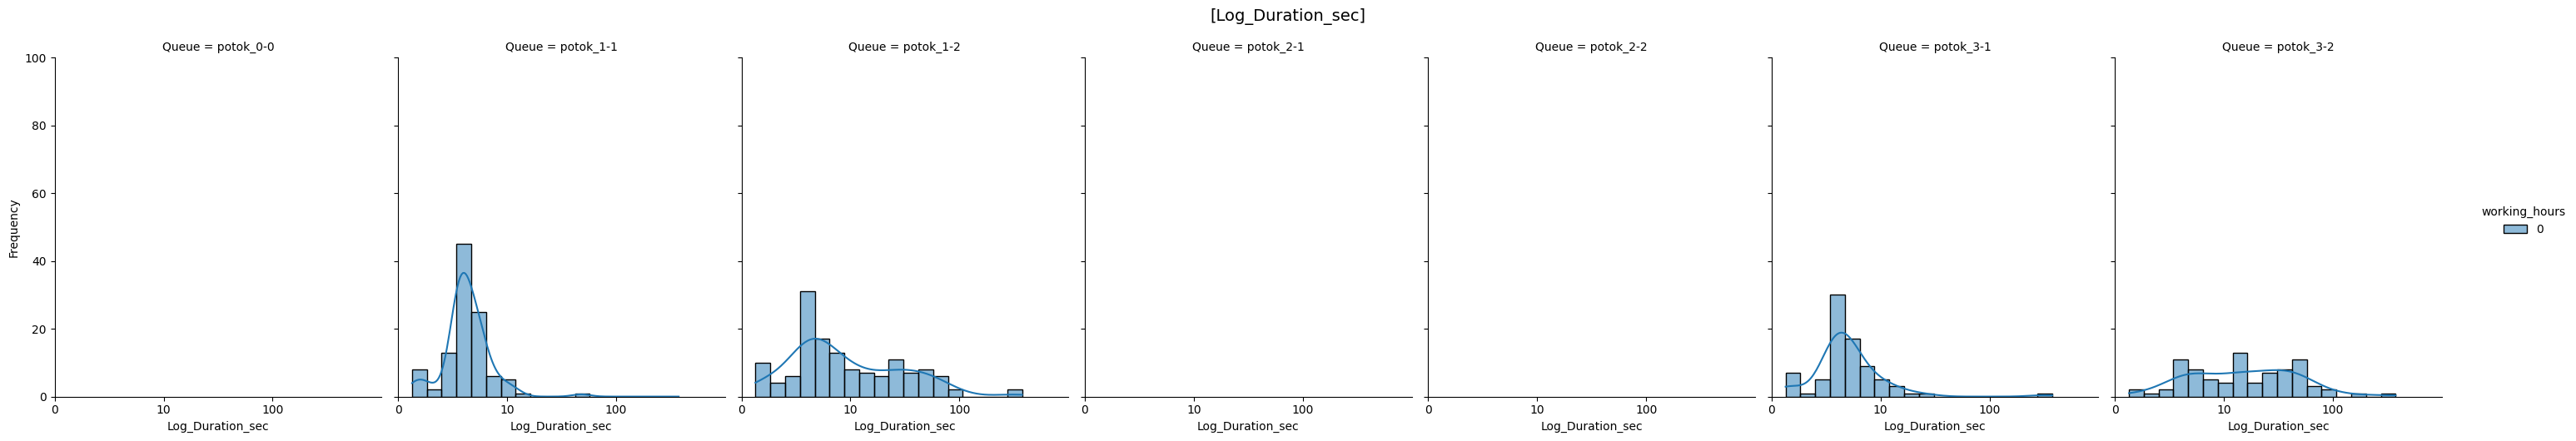

7


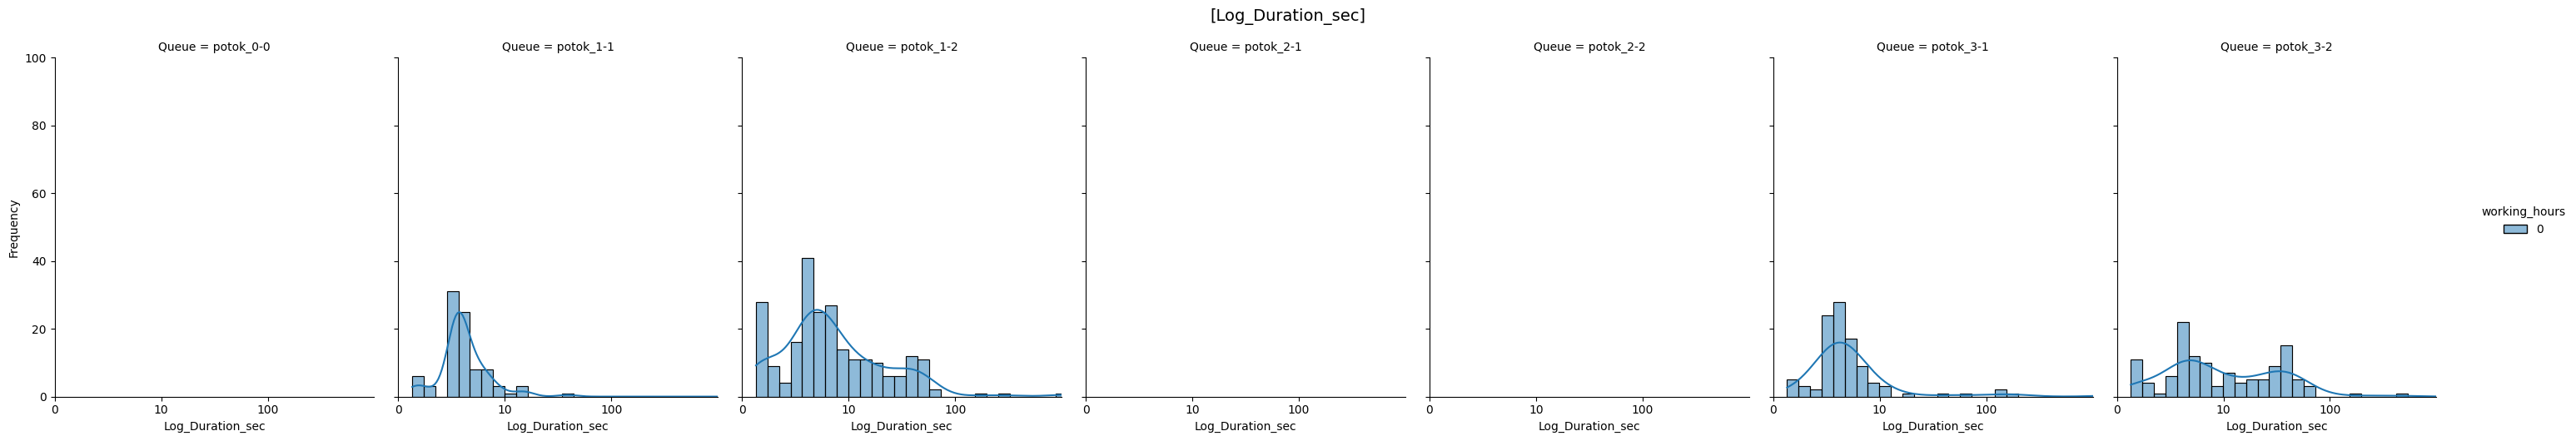

In [64]:
# Create a histogram with groupings based on Order Year
for i, v in enumerate(sorted(df["weekday"].unique())):
    print(v)
    g = sns.displot(
        data=df_sample[df_sample["weekday"] == v],
        x="Log_Duration_sec",
        hue="working_hours",
        kde=True,
#         hue_order=WEEKDAY_ORDER,
        col="Queue",
        col_order=HUE_ORDER,
        aspect=.85,
        multiple="stack"
    )

    # Customize the plot
    g.set(xlim=(0, 3), ylim=(0, 100), xlabel="Log_Duration_sec", ylabel="Frequency")
    g.set(xticks=[0, 1, 2], xticklabels=["0", "10", "100"])
    g.fig.suptitle(f"[Log_Duration_sec]", fontsize=14, y=1.05)
    # Show the plot
    plt.show()

## BOX PLOTS

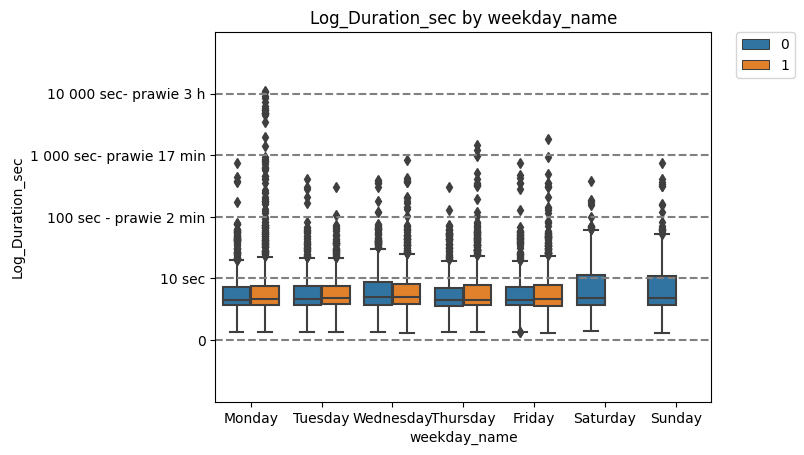

In [138]:
# Create a box plot with groupings based on Order Year
g = sns.boxplot(data=df_sample, x="weekday_name", y="Log_Duration_sec", hue="working_hours", order=WEEKDAY_ORDER)

# Customize the plot
g.set(ylim=(-1, 5), xlabel="weekday_name", ylabel="Log_Duration_sec", title="Log_Duration_sec by weekday_name")

g.set(yticks=[0, 1, 2, 3, 4], yticklabels=["0", "10 sec", "100 sec - prawie 2 min", "1 000 sec- prawie 17 min", "10 000 sec- prawie 3 h"])
# Move the legend outside the chart box
# Add horizontal lines at each ytick
yticks = plt.yticks()[0]
for ytick in yticks:
    plt.axhline(ytick, color='gray', linestyle='--')

# Move the legend outside the chart box
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

February
March


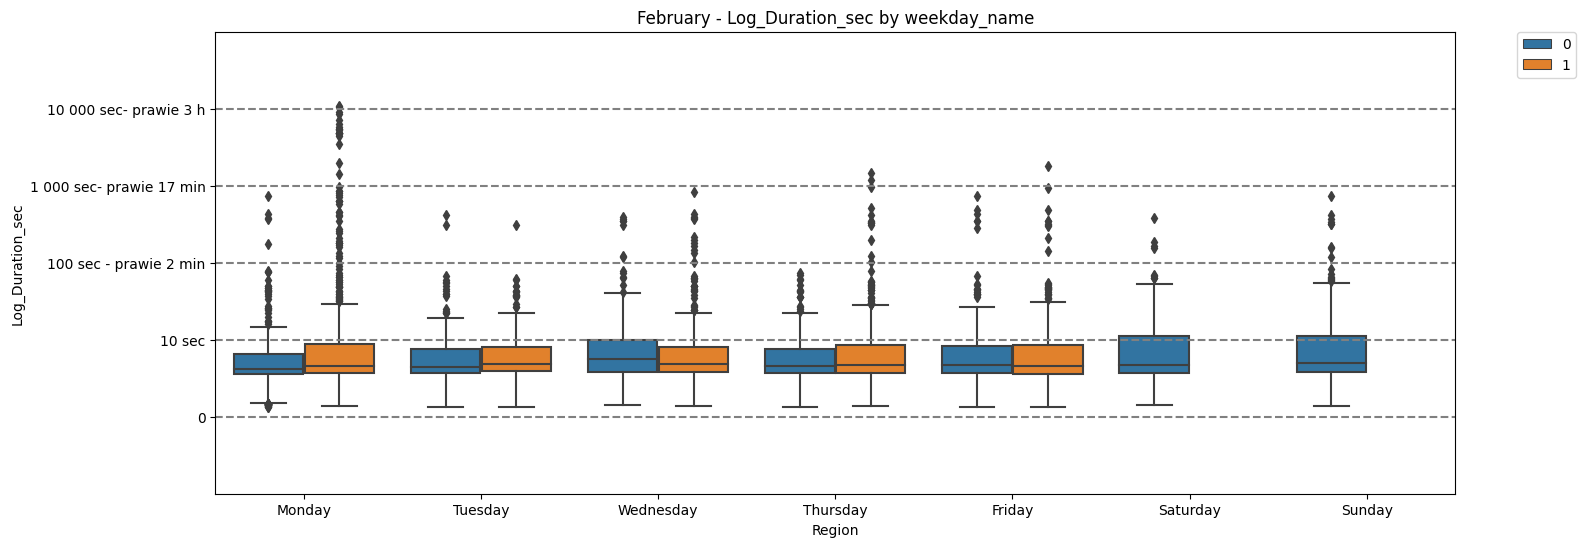

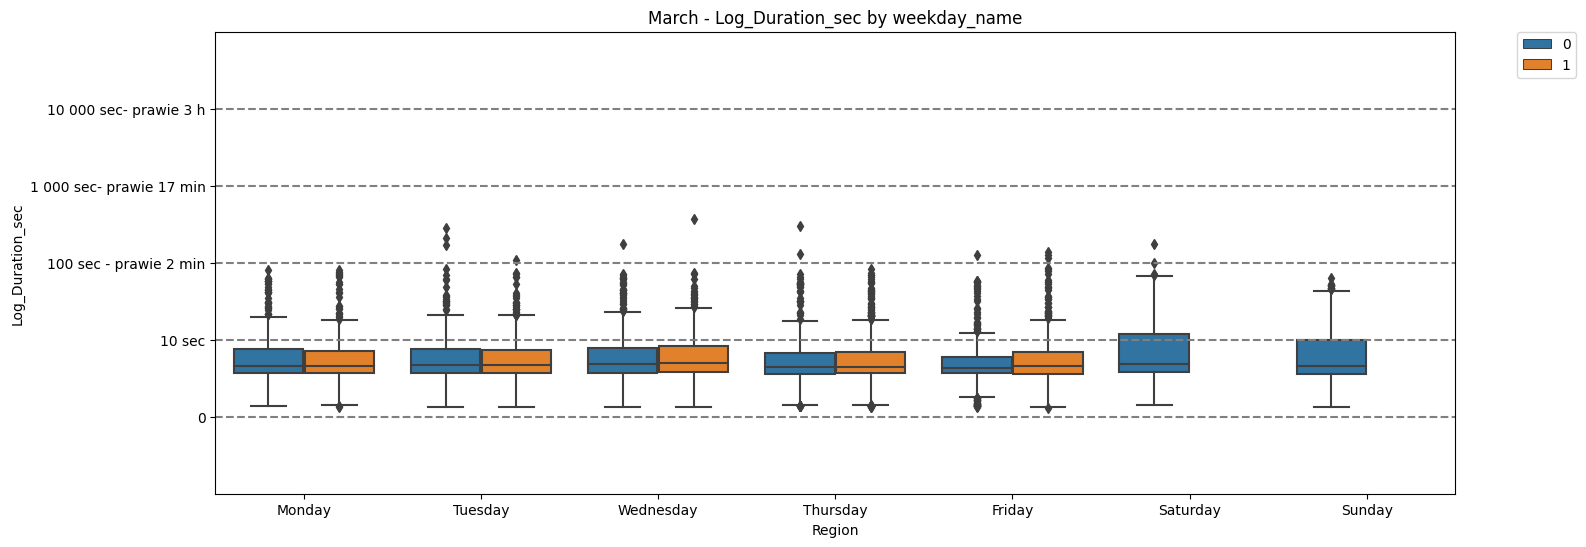

In [139]:
for i, v in enumerate(sorted(df["month_name"].unique())):
    print(v)

    # Set the figure size
    plt.figure(figsize=(16, 6))

    # Check if dataframe is not empty before creating the boxplot
    if not df_sample[df_sample["month_name"] == v].empty:
        # Create a box plot with groupings based on Order Year
        g = sns.boxplot(data=df_sample[df_sample["month_name"] == v], x="weekday_name", y="Log_Duration_sec", hue="working_hours", order=WEEKDAY_ORDER)

        # Customize the plot
        g.set(ylim=(-1, 5), xlabel="Region", ylabel="Log_Duration_sec", title=f"{v} - Log_Duration_sec by weekday_name")
        g.set(yticks=[0, 1, 2, 3, 4], yticklabels=["0", "10 sec", "100 sec - prawie 2 min", "1 000 sec- prawie 17 min", "10 000 sec- prawie 3 h"])
        # Add horizontal lines at each ytick
        yticks = plt.yticks()[0]
        for ytick in yticks:
            plt.axhline(ytick, color='gray', linestyle='--')
        # Move the legend outside the chart box
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


5
6
7
8
9
10
11
12
13


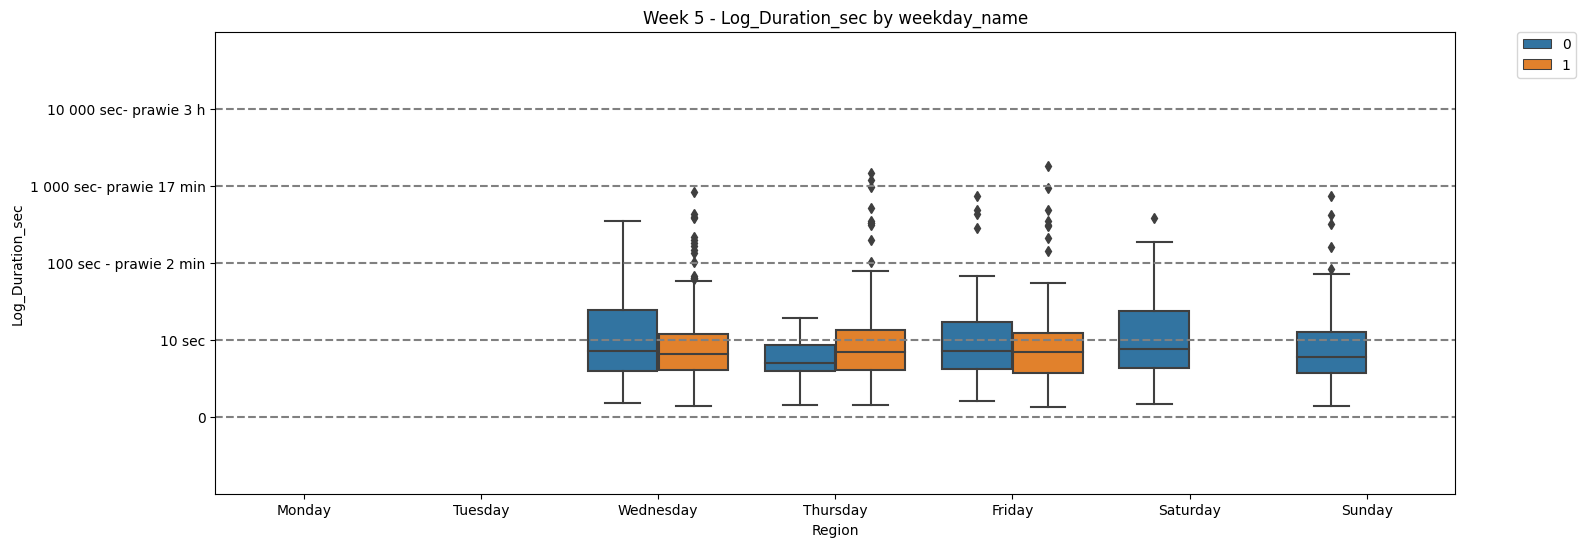

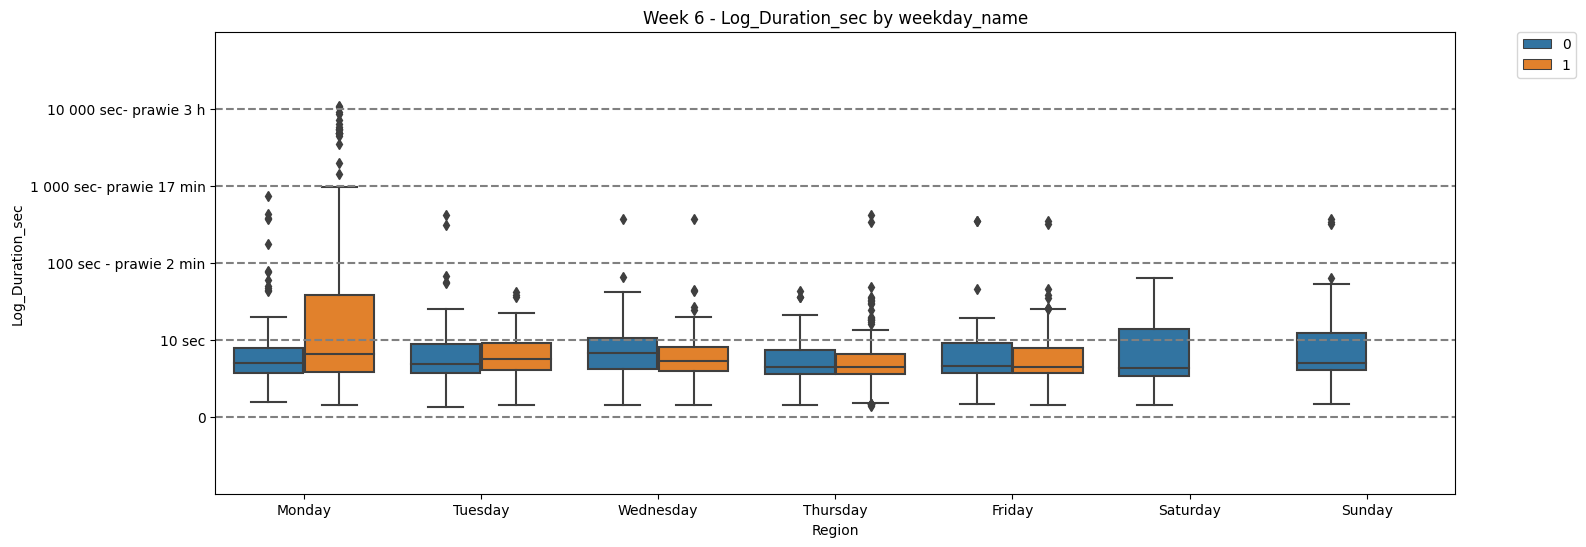

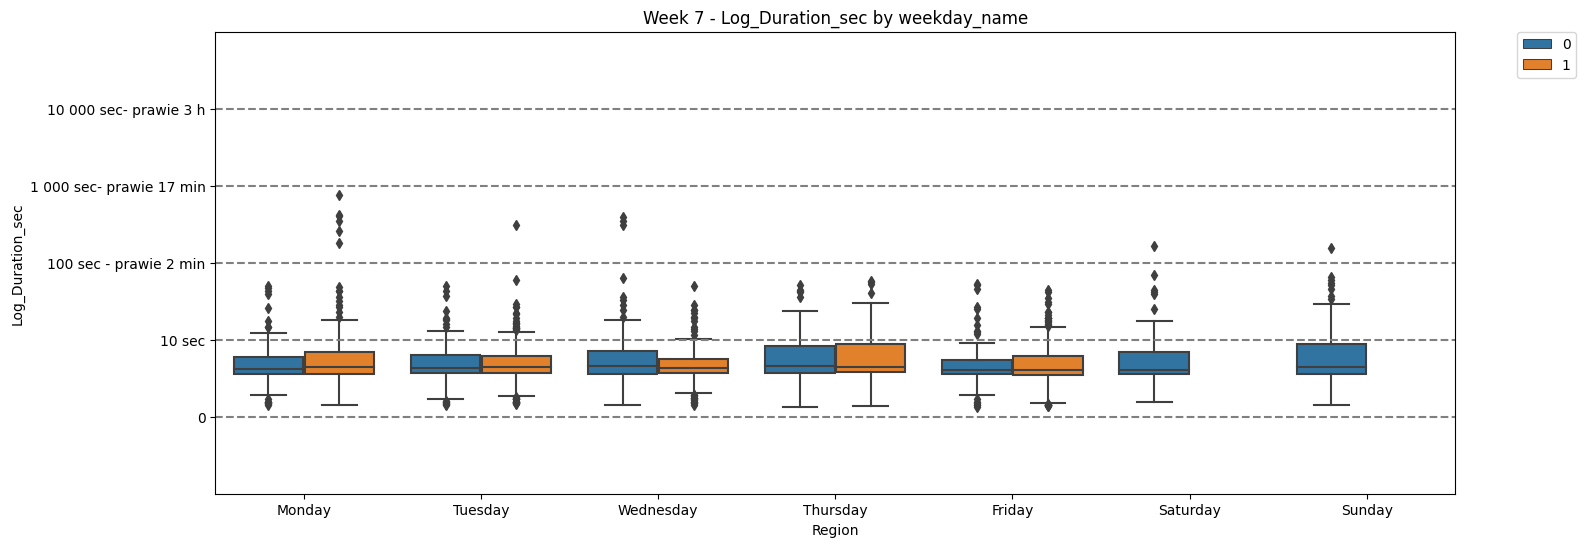

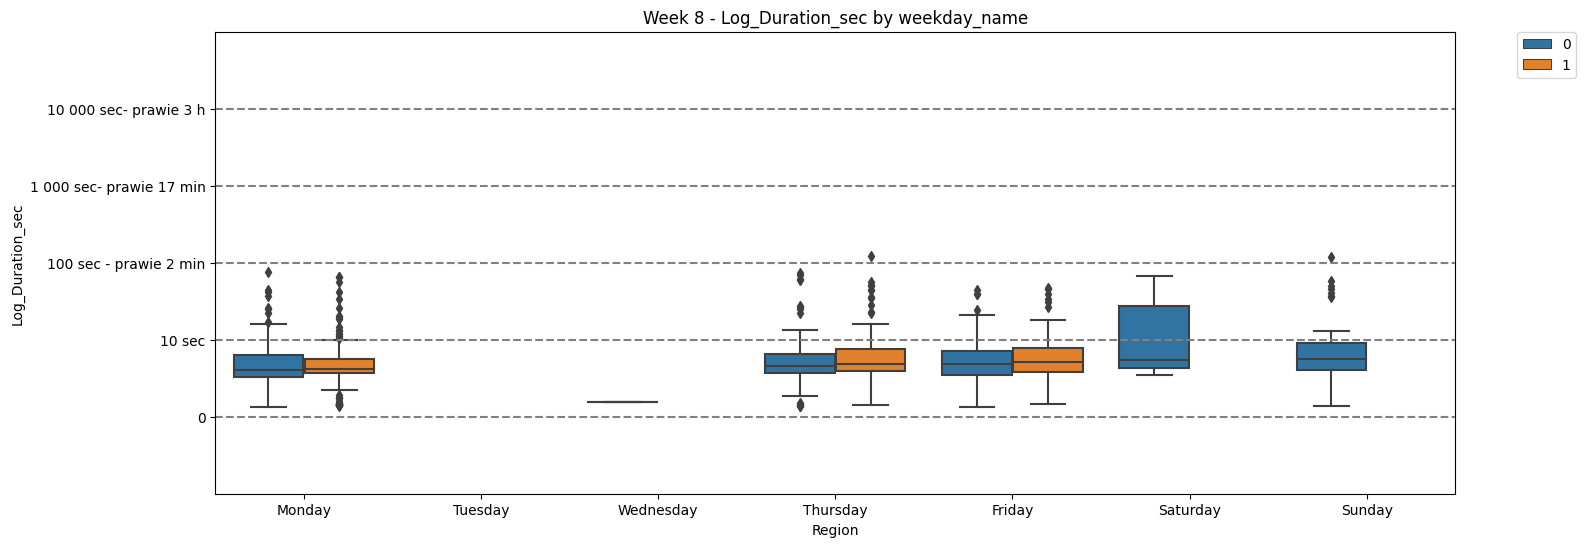

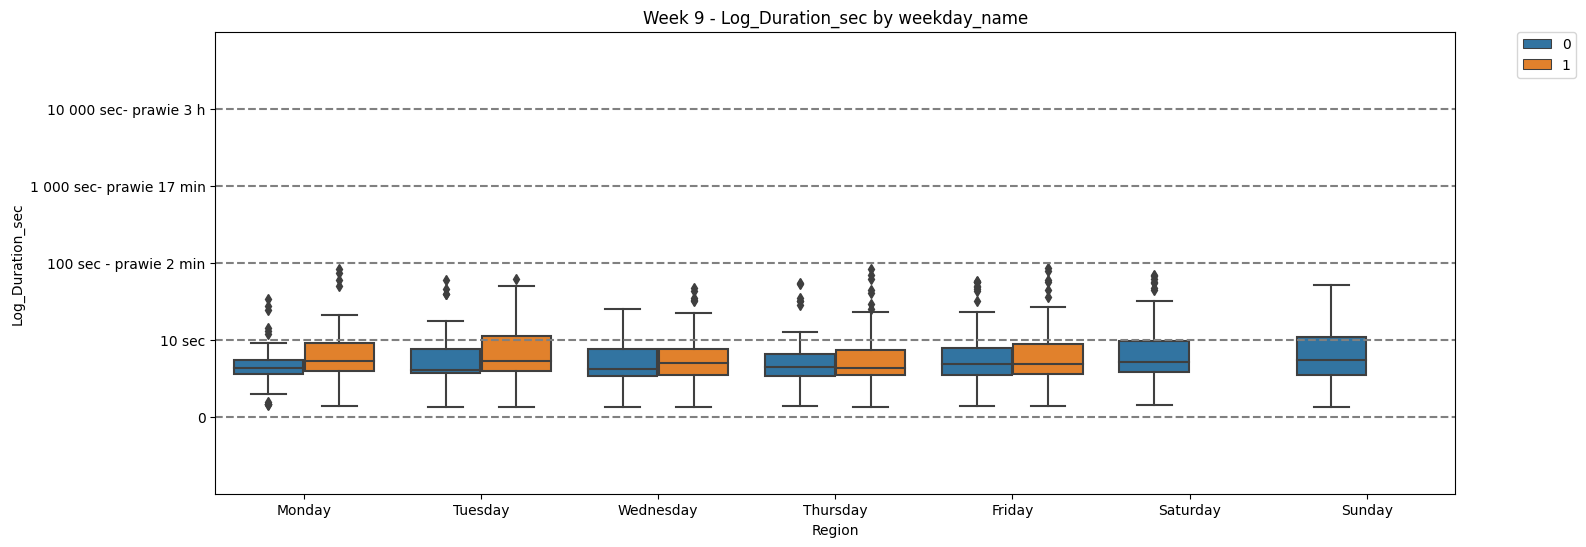

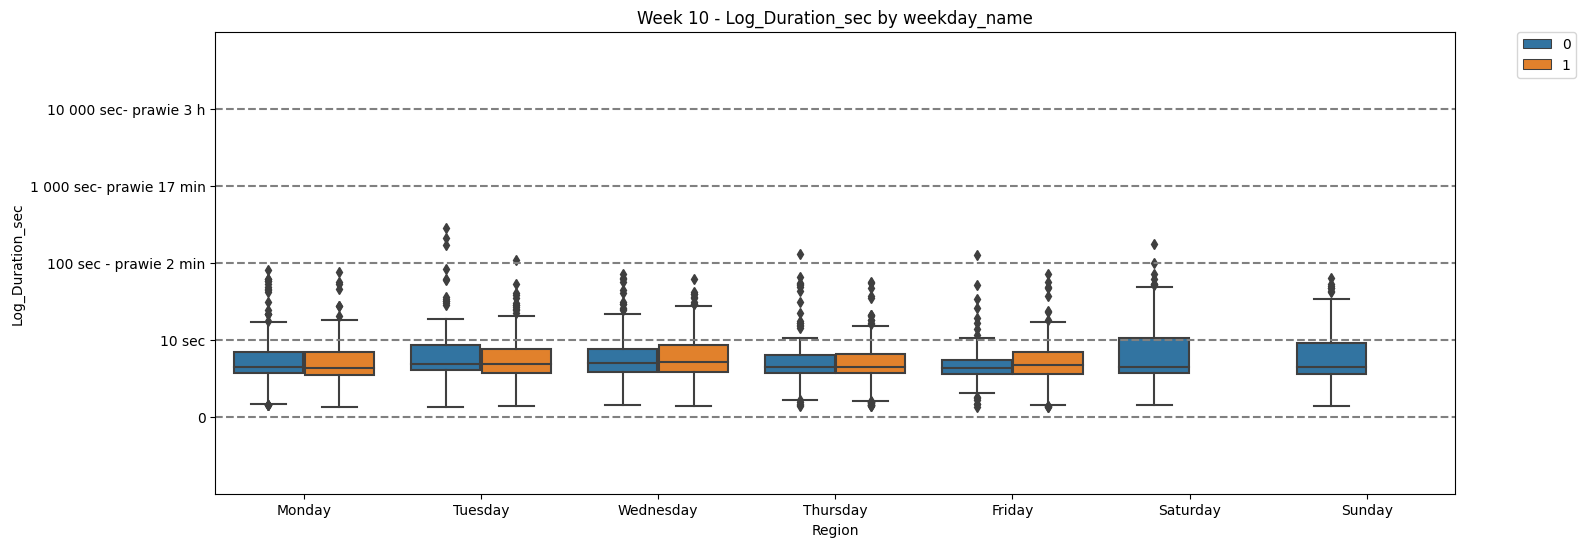

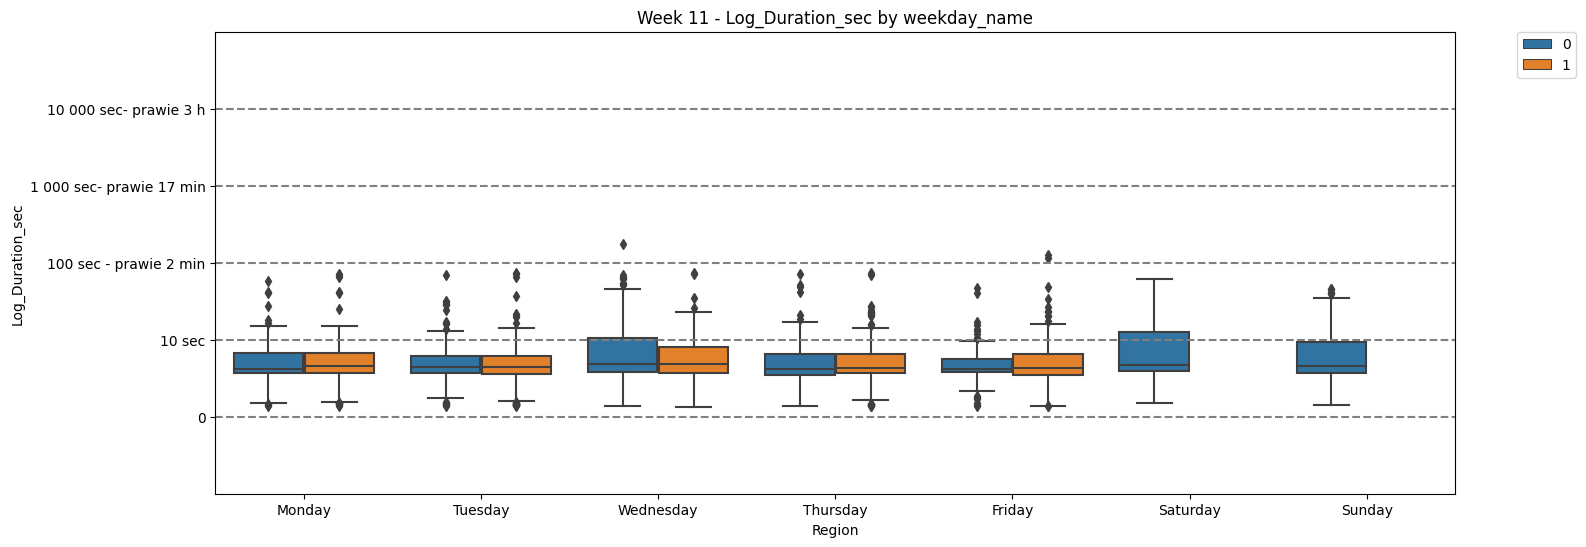

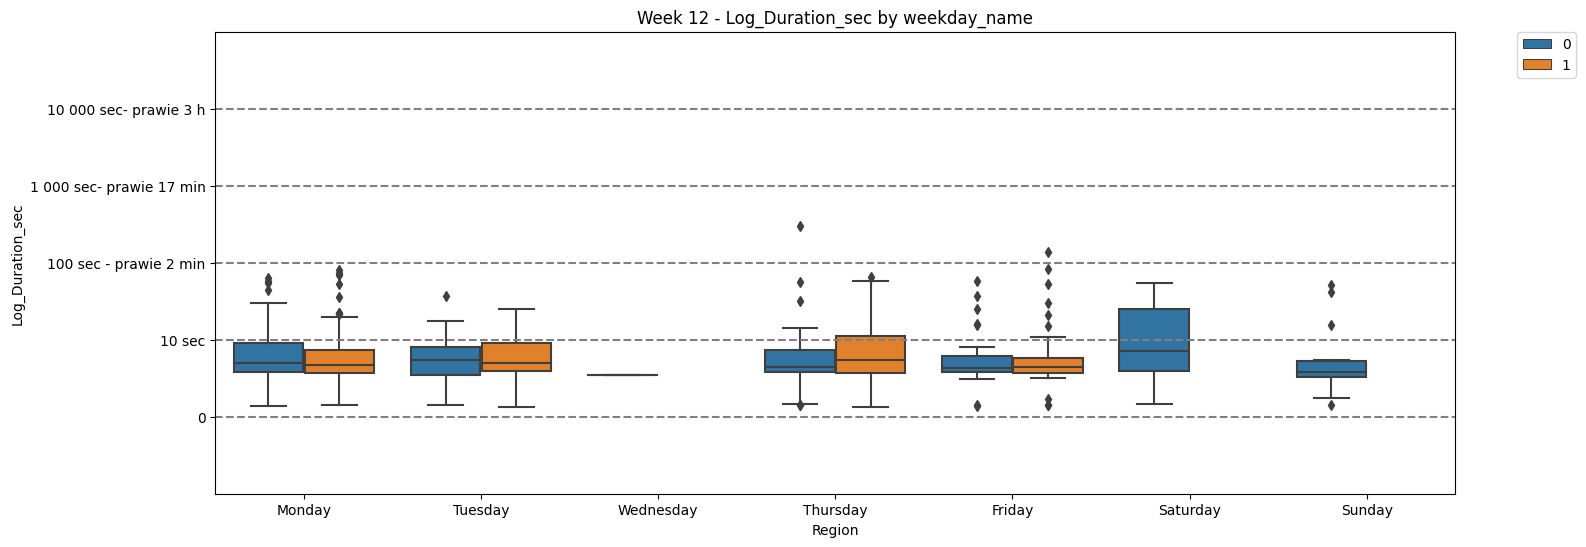

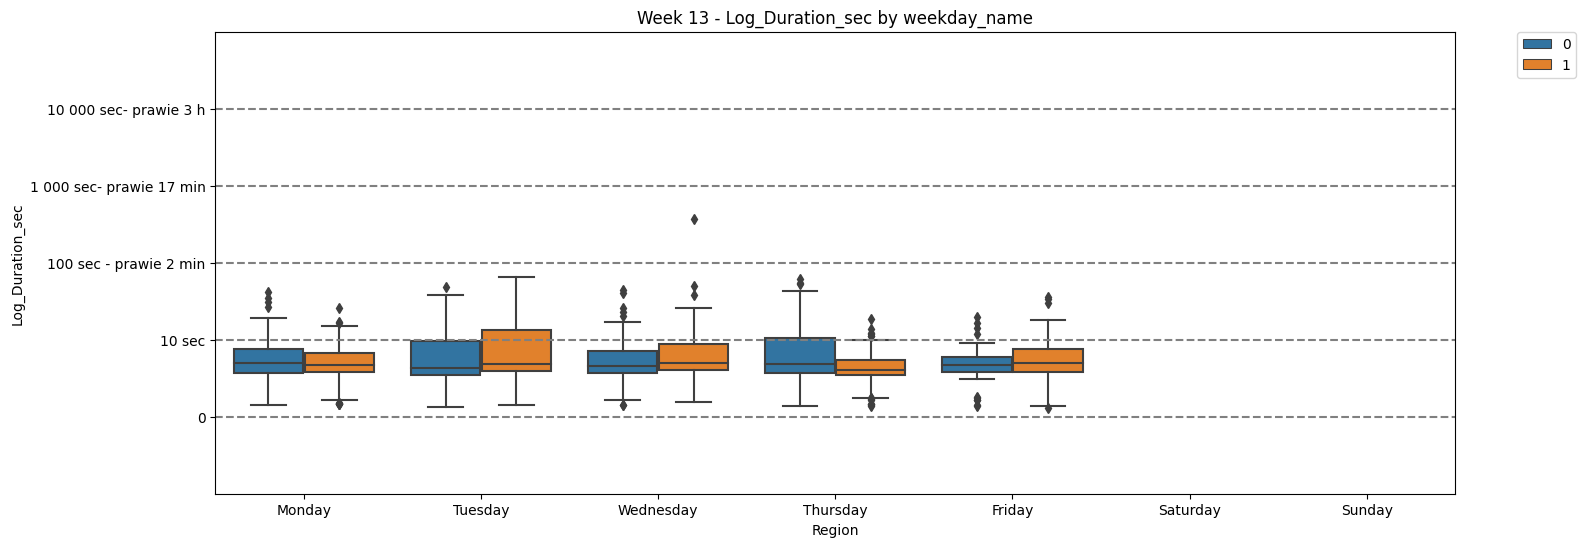

In [141]:
for i, v in enumerate(sorted(df["week"].unique())):
    print(v)

    # Set the figure size
    plt.figure(figsize=(16, 6))

    # Check if dataframe is not empty before creating the boxplot
    if not df_sample[df_sample["week"] == v].empty:
        # Create a box plot with groupings based on Order Year
        g = sns.boxplot(data=df_sample[df_sample["week"] == v], x="weekday_name", y="Log_Duration_sec", hue="working_hours", order=WEEKDAY_ORDER)

        # Customize the plot
        g.set(ylim=(-1, 5), xlabel="Region", ylabel="Log_Duration_sec", title=f"Week {v} - Log_Duration_sec by weekday_name")
        g.set(yticks=[0, 1, 2, 3, 4], yticklabels=["0", "10 sec", "100 sec - prawie 2 min", "1 000 sec- prawie 17 min", "10 000 sec- prawie 3 h"])
        # Add horizontal lines at each ytick
        yticks = plt.yticks()[0]
        for ytick in yticks:
            plt.axhline(ytick, color='gray', linestyle='--')
        # Move the legend outside the chart box
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


5
6
7
8
9
10
11
12
13


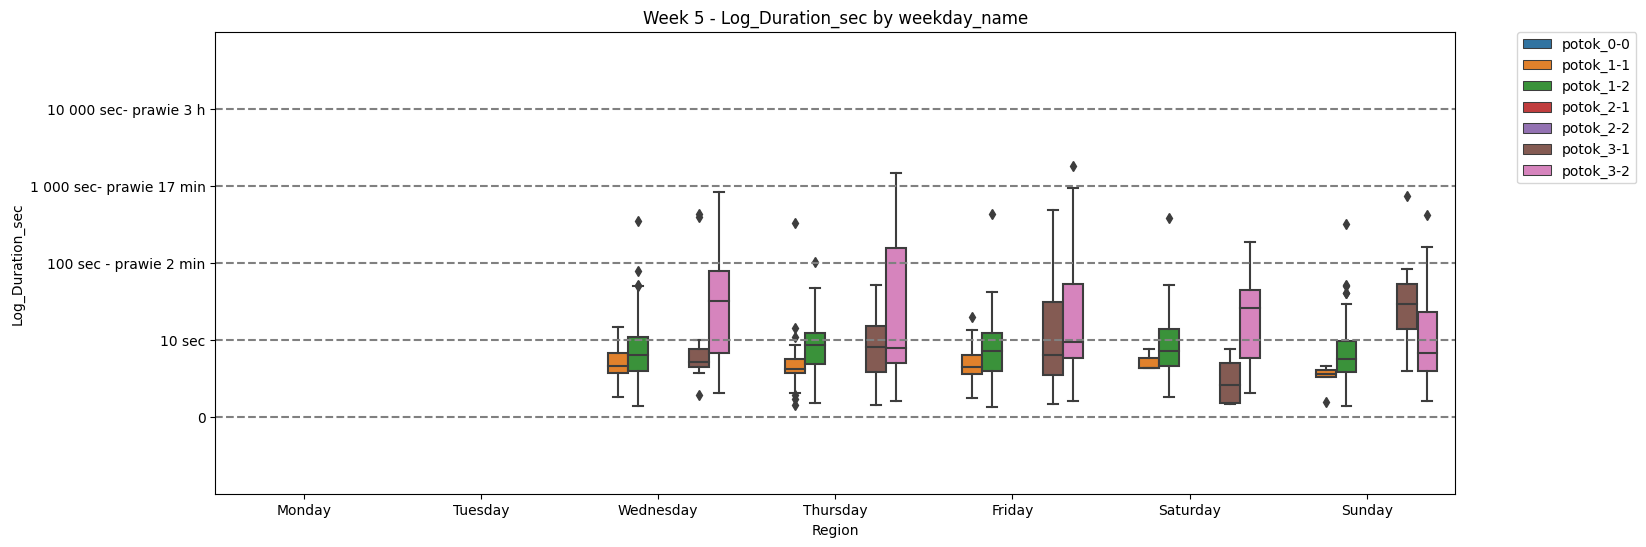

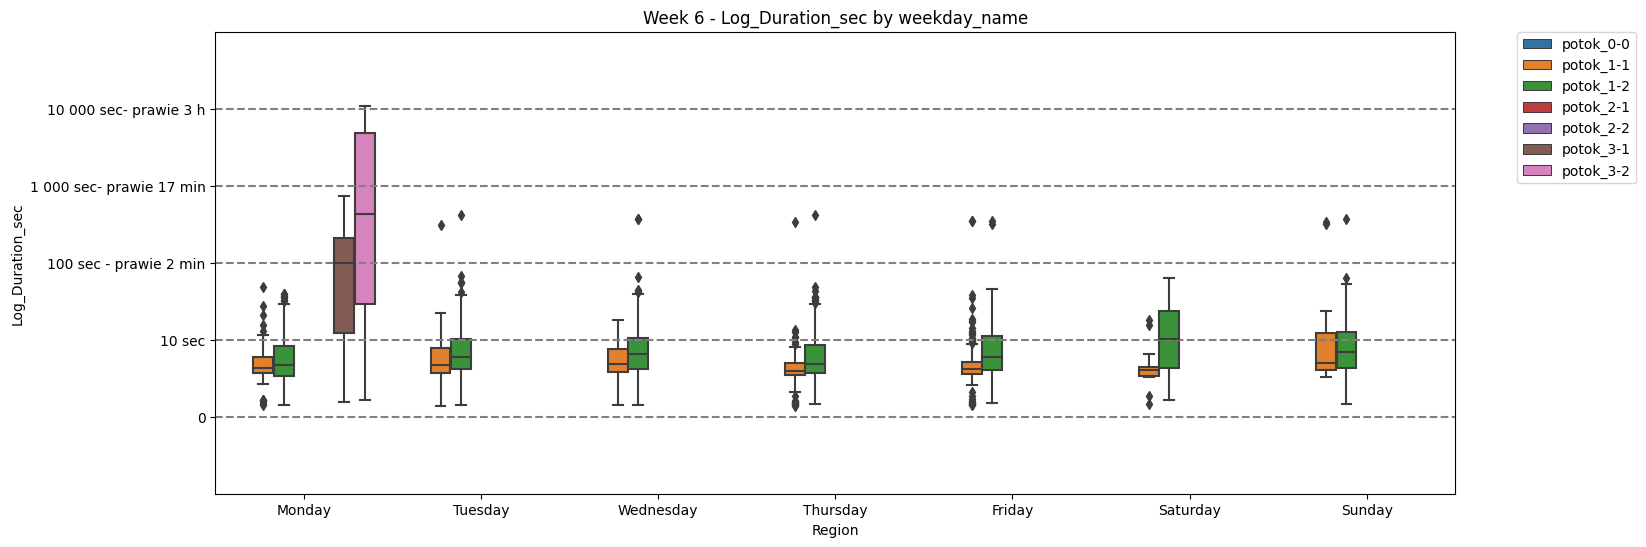

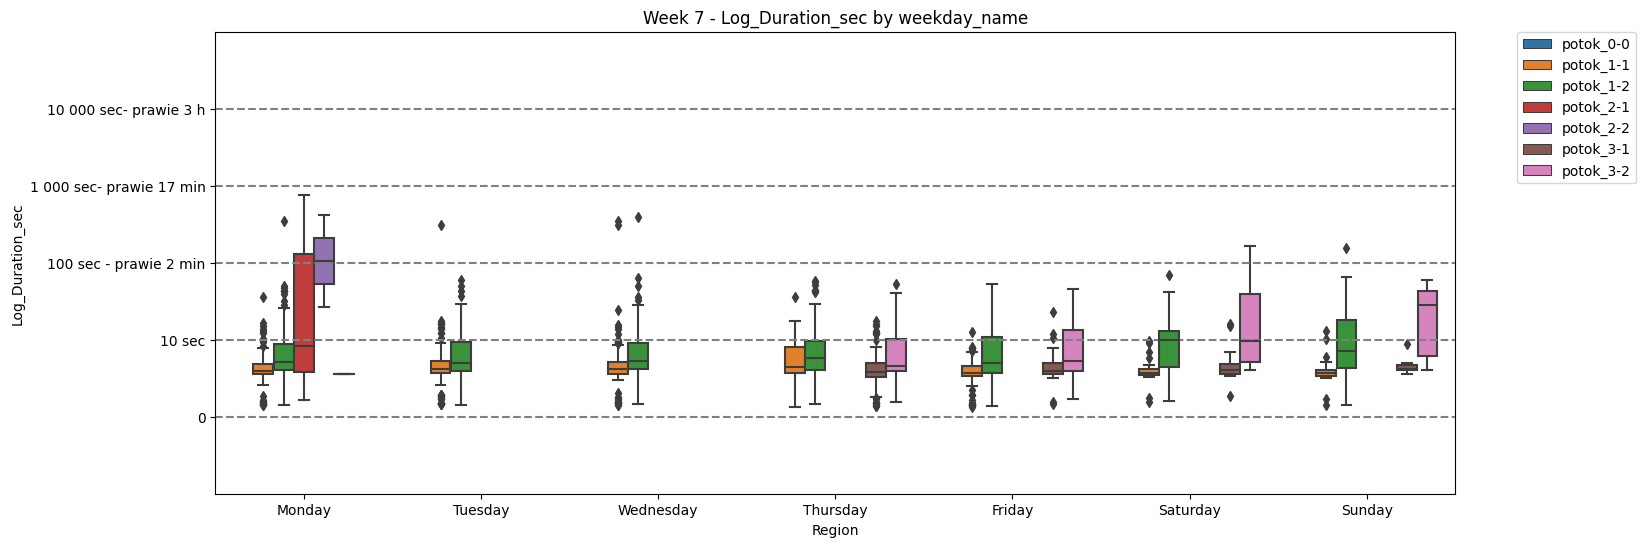

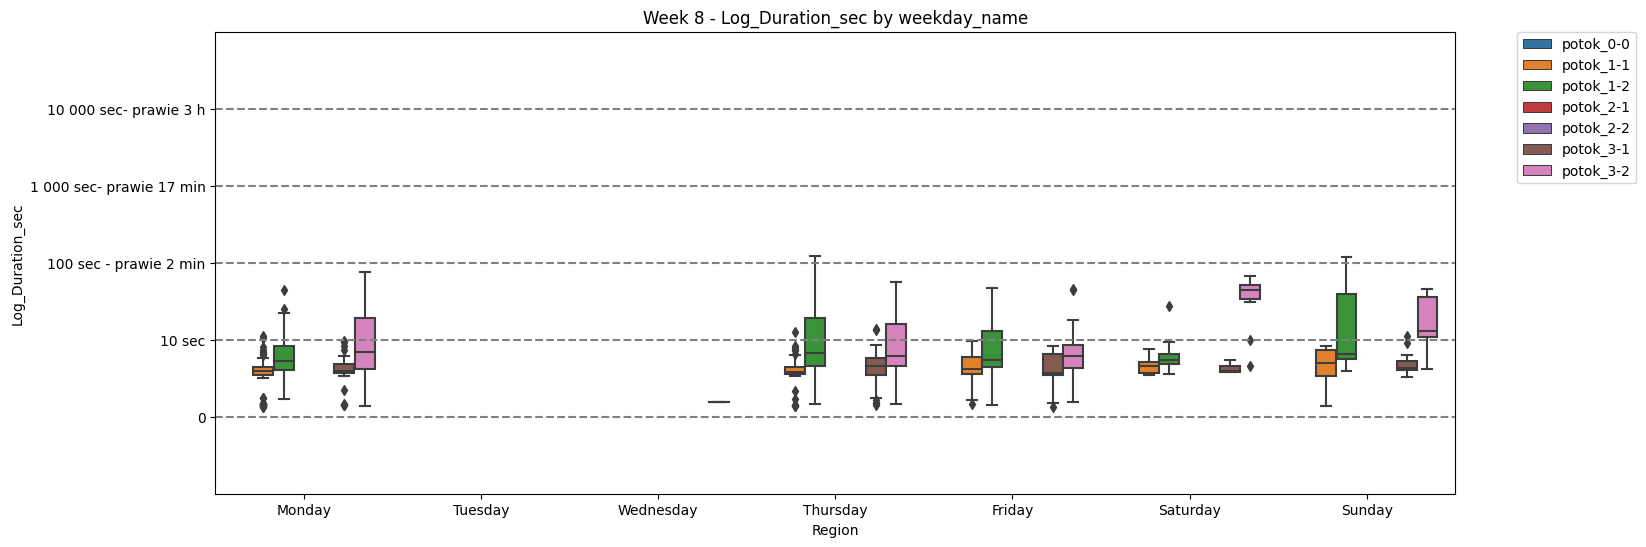

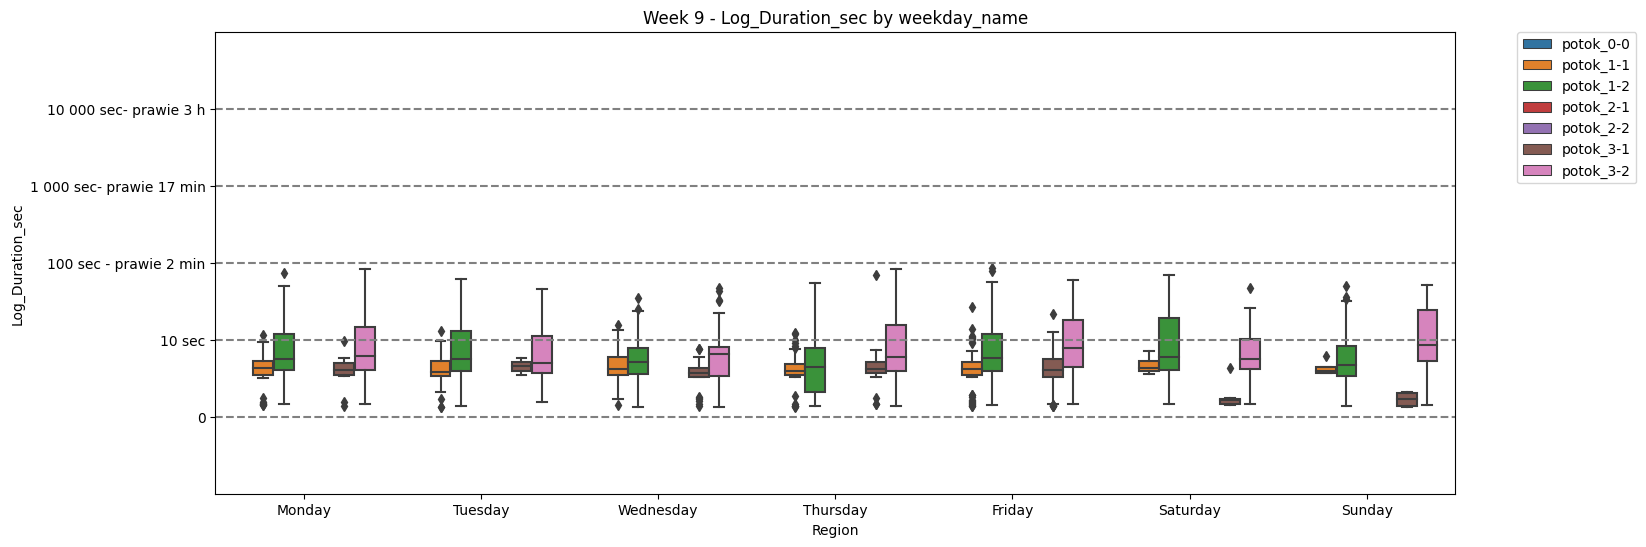

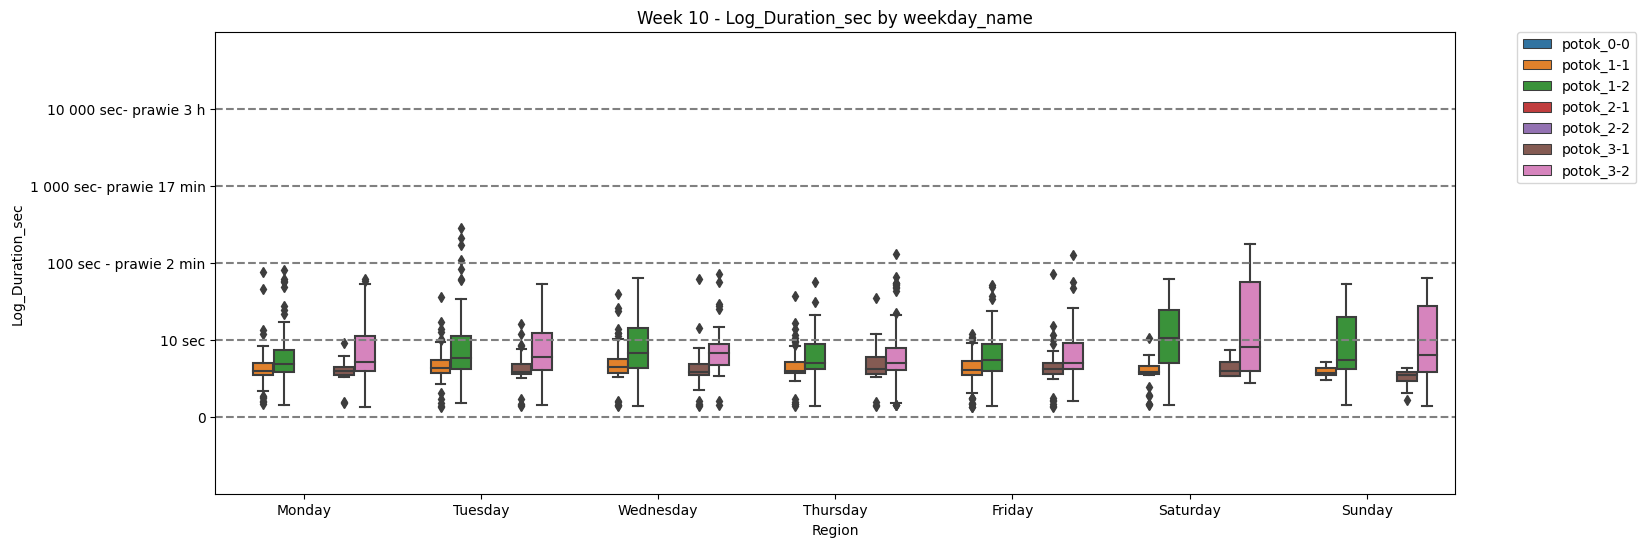

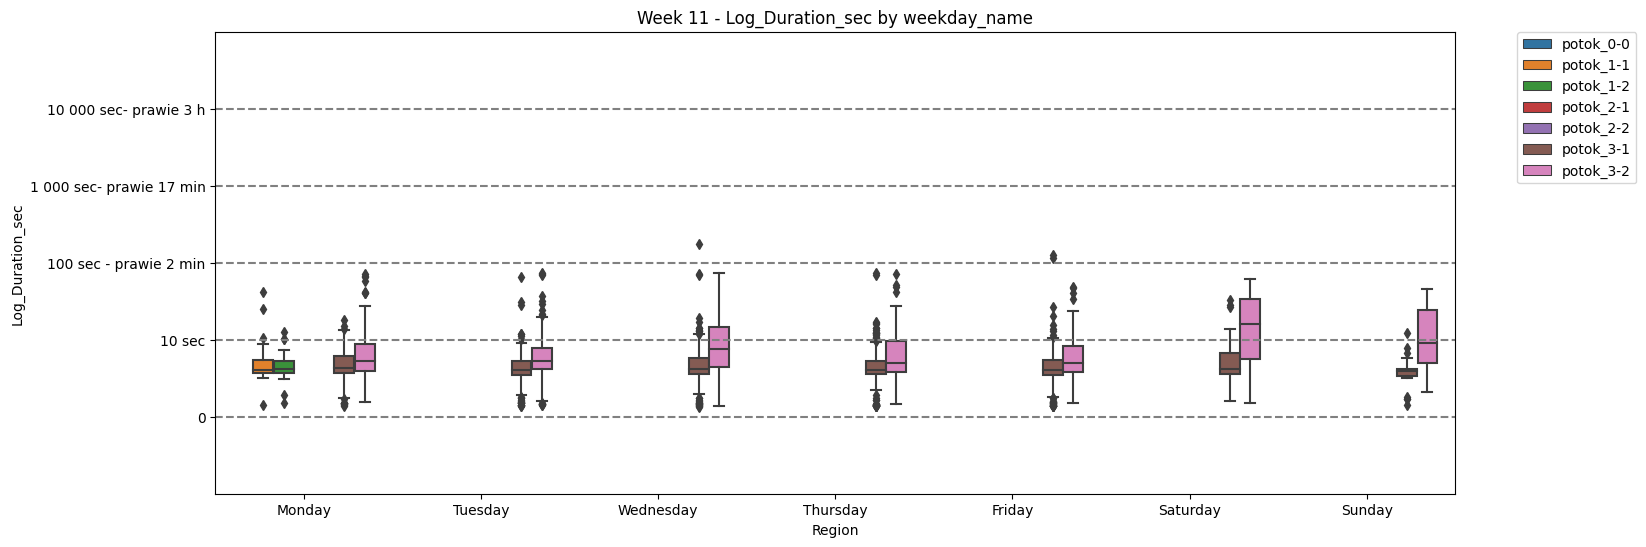

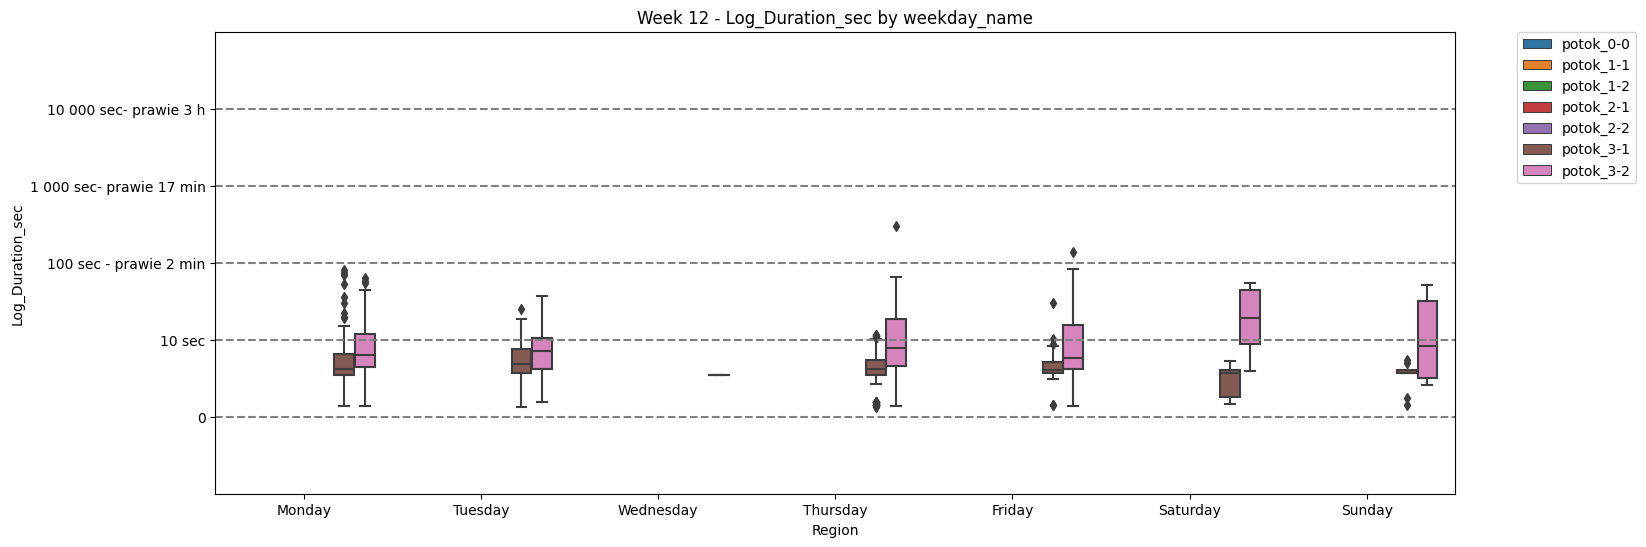

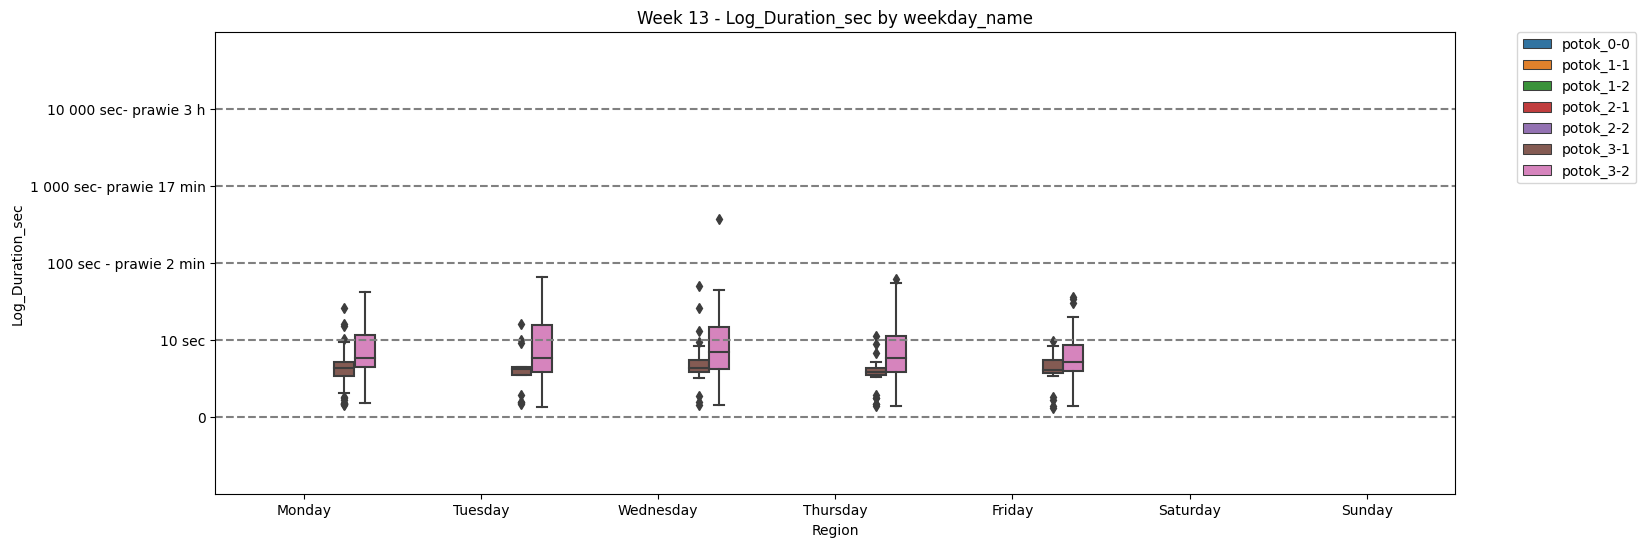

In [149]:
for i, v in enumerate(sorted(df["week"].unique())):
    print(v)

    # Set the figure size
    plt.figure(figsize=(16, 6))

    # Check if dataframe is not empty before creating the boxplot
    if not df_sample[df_sample["week"] == v].empty:
        # Create a box plot with groupings based on Order Year
        g = sns.boxplot(data=df_sample[df_sample["week"] == v], x="weekday_name", y="Log_Duration_sec", order=WEEKDAY_ORDER, hue="Queue", hue_order=HUE_ORDER)

        # Customize the plot
        g.set(ylim=(-1, 5), xlabel="Region", ylabel="Log_Duration_sec", title=f"Week {v} - Log_Duration_sec by weekday_name")
        g.set(yticks=[0, 1, 2, 3, 4], yticklabels=["0", "10 sec", "100 sec - prawie 2 min", "1 000 sec- prawie 17 min", "10 000 sec- prawie 3 h"])
        # Add horizontal lines at each ytick
        yticks = plt.yticks()[0]
        for ytick in yticks:
            plt.axhline(ytick, color='gray', linestyle='--')
        # Move the legend outside the chart box
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


Potok_0-0
potok_1-1
potok_1-2
potok_2-1
potok_2-2
potok_3-1
potok_3-2


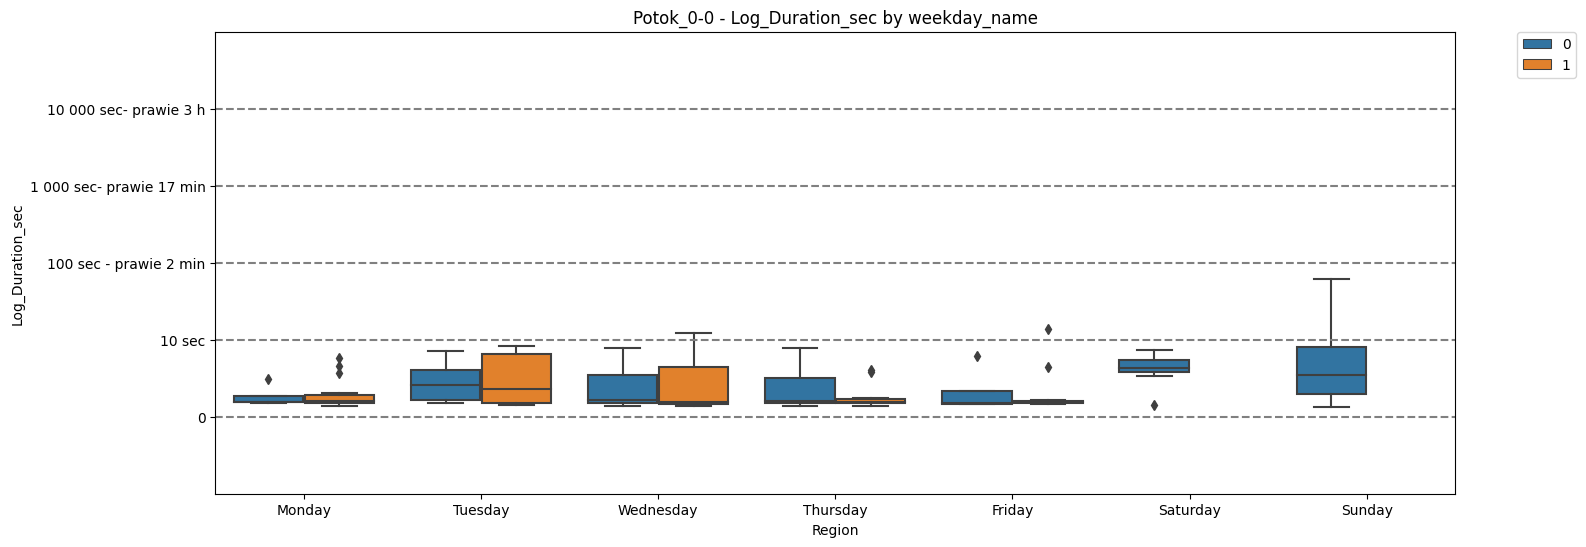

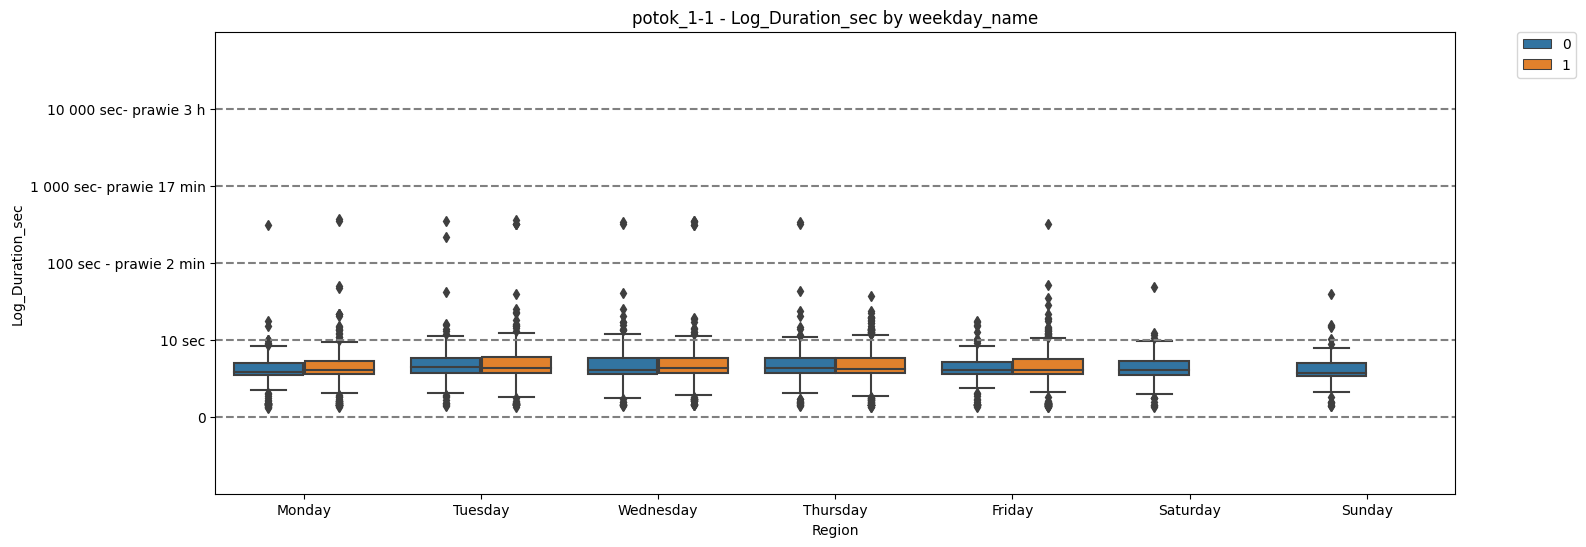

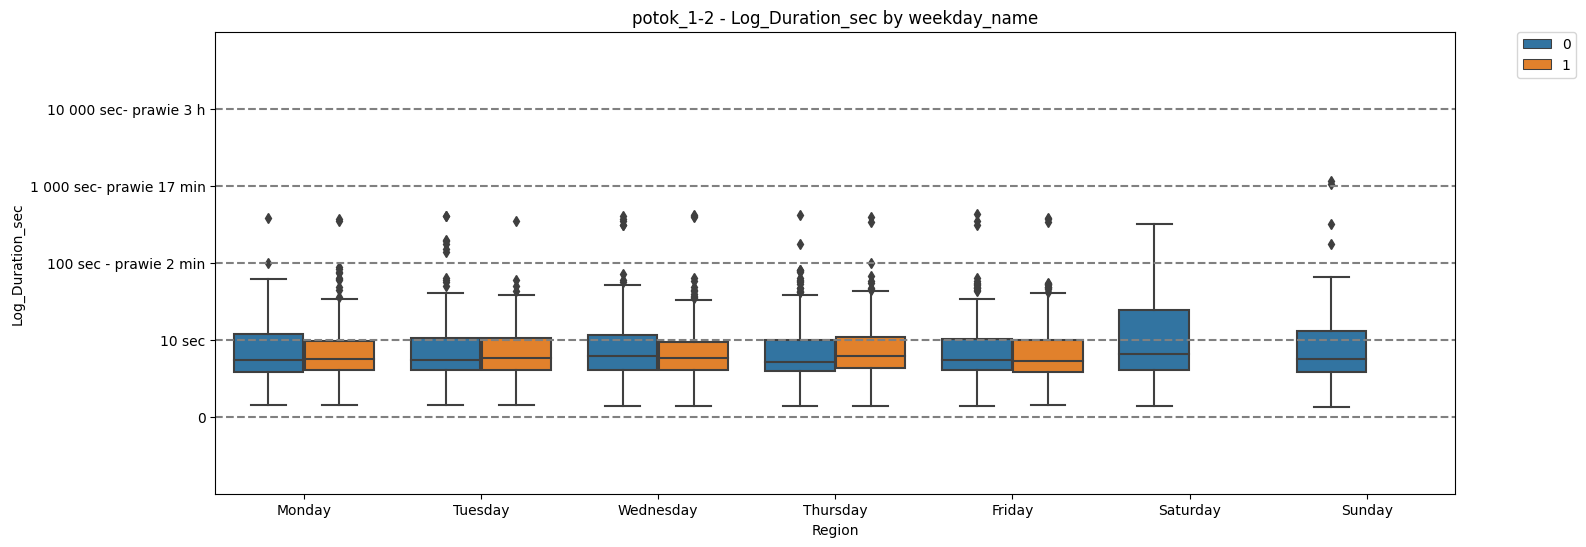

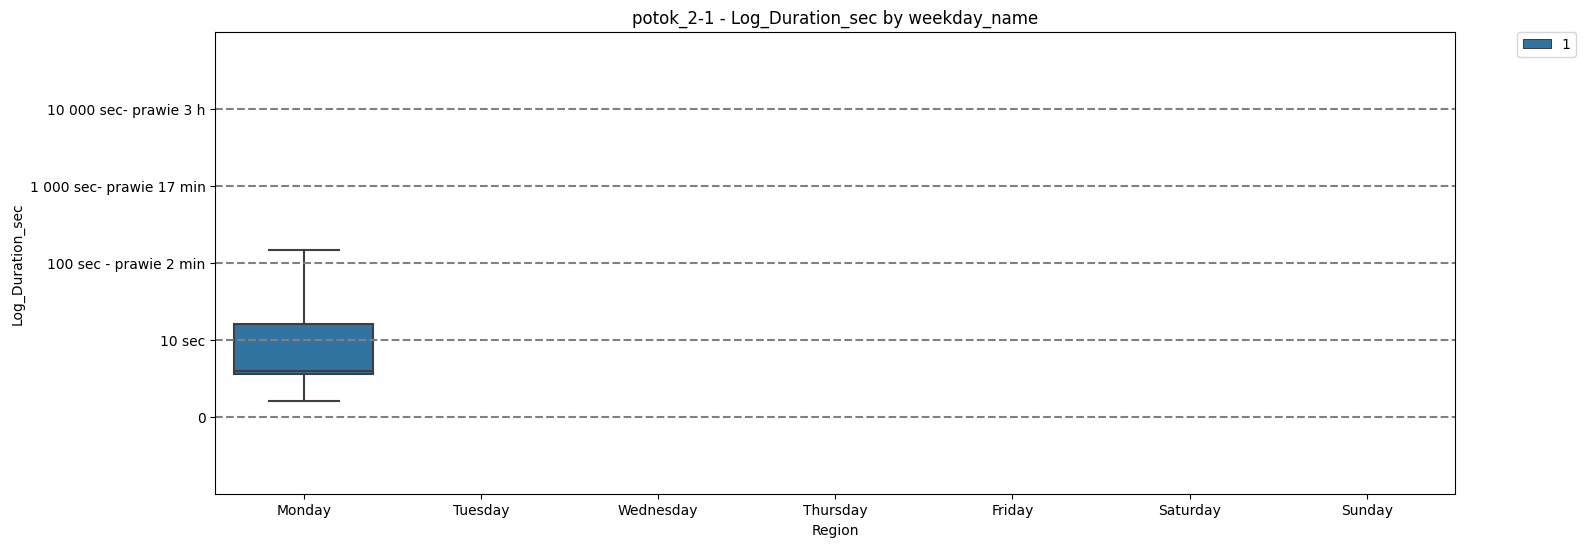

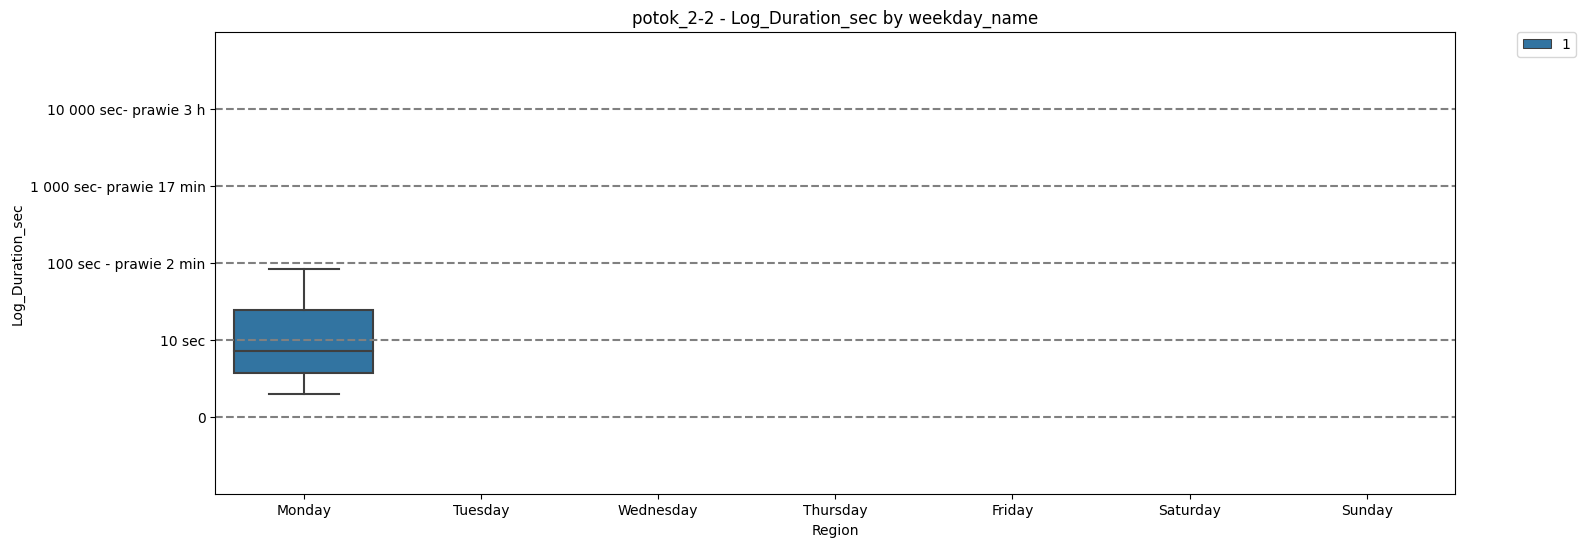

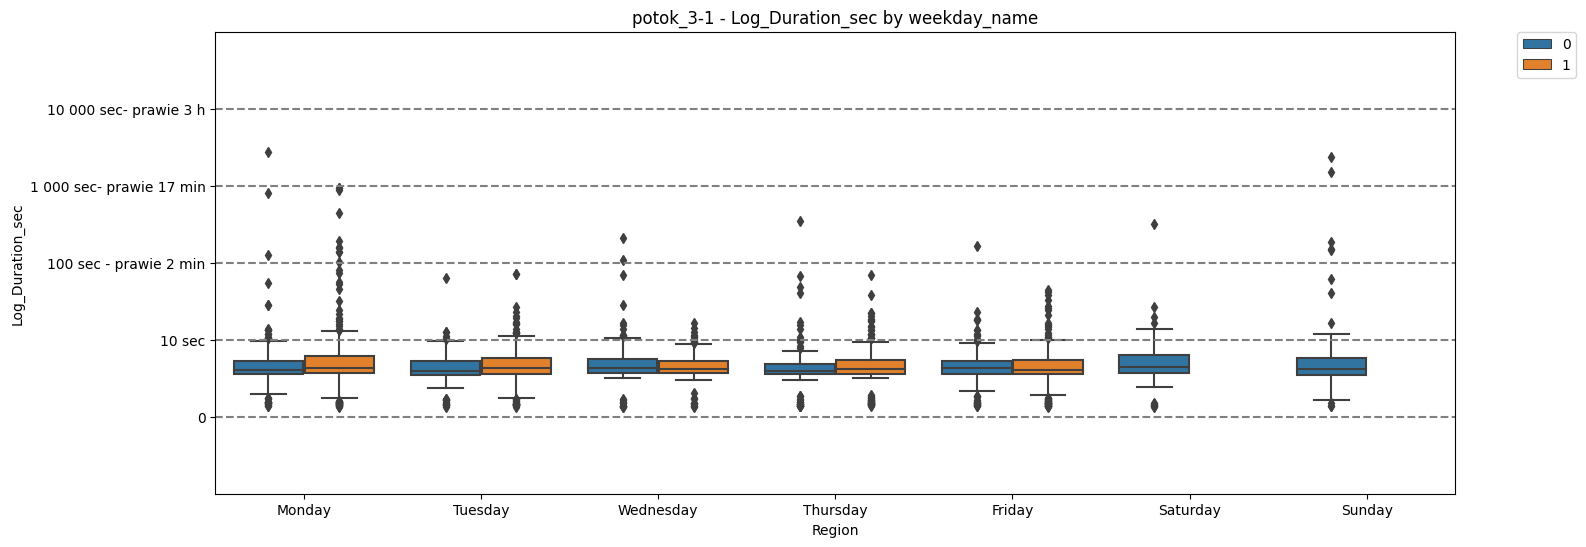

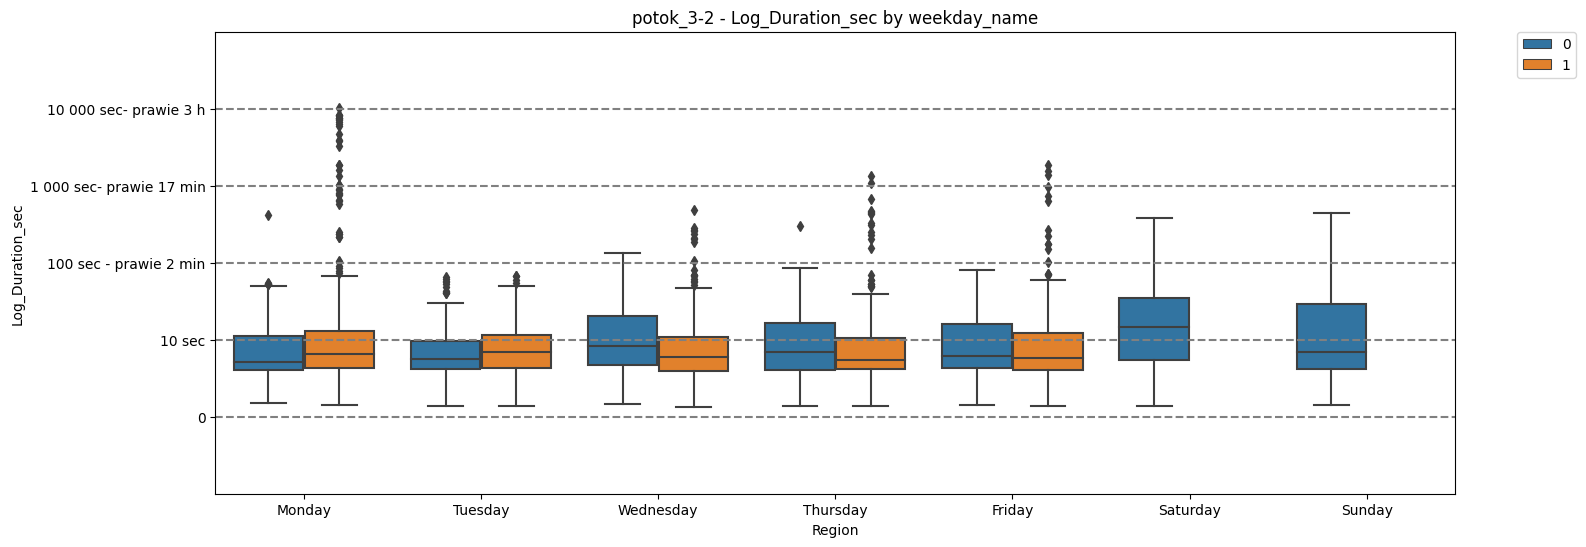

In [101]:
for i, v in enumerate(sorted(df["Queue"].unique())):
    print(v)
    
    # Set the figure size
    plt.figure(figsize=(16, 6))

    # Create a box plot with groupings based on Order Year
    g = sns.boxplot(data=df_sample[df_sample["Queue"] == v], x="weekday_name", y="Log_Duration_sec", hue="working_hours", order=WEEKDAY_ORDER)

    # Customize the plot
    g.set(ylim=(-1, 5), xlabel="Region", ylabel="Log_Duration_sec", title=f"{v} - Log_Duration_sec by weekday_name")
    g.set(yticks=[0, 1, 2, 3, 4], yticklabels=["0", "10 sec", "100 sec - prawie 2 min", "1 000 sec- prawie 17 min", "10 000 sec- prawie 3 h"])
    # Add horizontal lines at each ytick
    yticks = plt.yticks()[0]
    for ytick in yticks:
        plt.axhline(ytick, color='gray', linestyle='--')
    # Move the legend outside the chart box
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)